<a href="https://colab.research.google.com/github/emersonvasconcelos/f1/blob/warm-up/MVP_F1_Warm_Up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

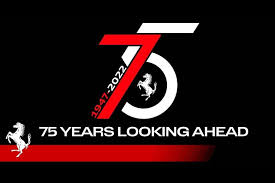

### MVP-F1 Warm-Up | Análise Exploratória

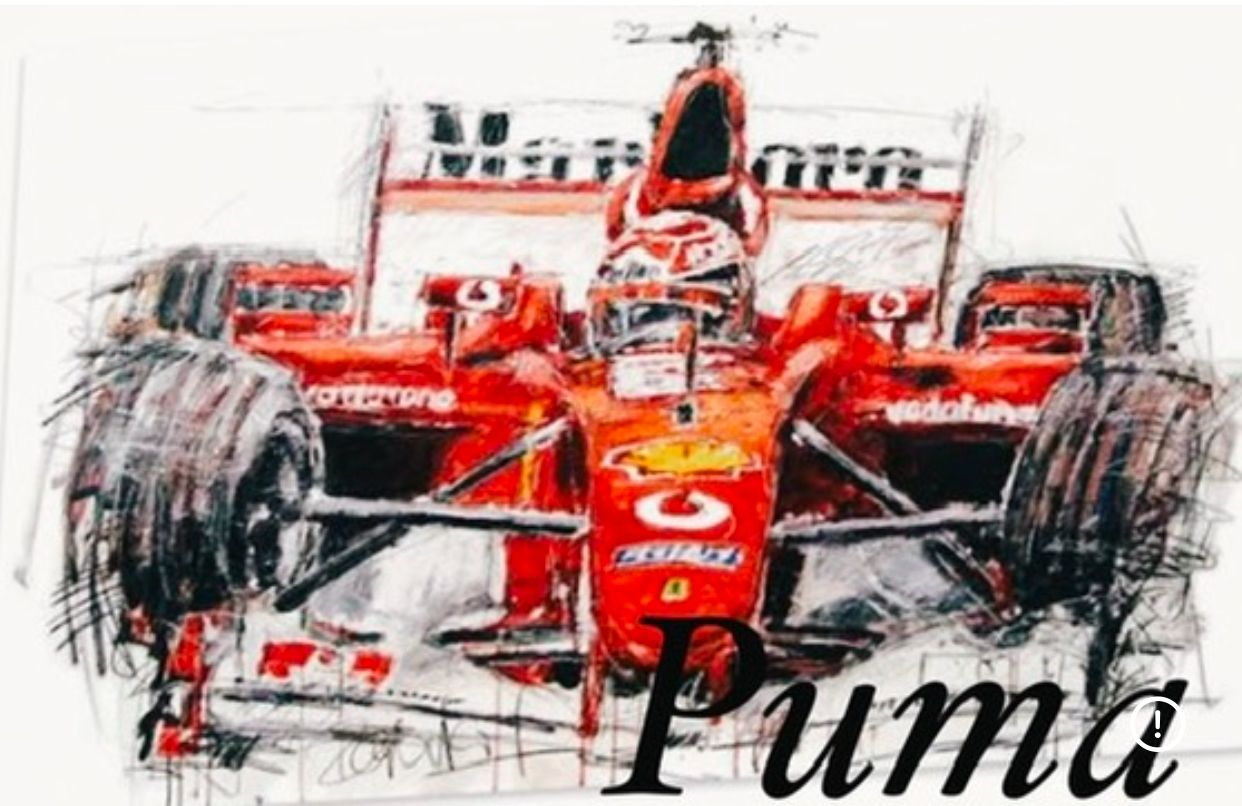

#### >> Desenvolver um Minimum Viable Product (MVP) que demonstre a capacidade de coletar, processar, armazenar e analisar dados históricos da Fórmula 1 ao longo de seus 75 anos, gerando insights valiosos para entusiastas, analistas e potenciais usuários de uma plataforma de dados mais completa.

#### >> Escopo do MVP-F1-Warm-Up

***Carregamento -> Análise exploratória -> (aqui começa pré-processamento) -> Limpeza -> Split -> Transformações***


**Interpretação da correlação:**
Correlação positiva —> ambas sobem ou descem juntas
Sem correlação —> não têm relação direta
Correlação negativa —> uma sobe, a outra desce

Usar correlação de pearson para variáveis numéricas contínuas
Usar correlação de spearman para variáveis ordinais ou com relação não linear

Contexto, storytelling e hipóteses bem definidas;

Estatísticas descritivas (min, max, média, mediana, moda, desvio padrão);

Visualizações (histogramas, scatter, boxplots) com insights comentados;

Pré-processamento com one-hot encoding e balanceamento via SMOTE;

Baseline de Random Forest com avaliação (acurácia, F1‑score, matriz de confusão);

Checklists respondida, código limpo e bem documentado. **negrito**

#### >> Requisitos e composição da Nota MVP:

A) (1,0 pt) Execução sem erros:o notebook deve poder ser executado pelo professor do início ao fim sem erros no Google Colab.

B) (2,0 pts) Documentação consistente:utilize blocos de texto que expliquem textualmente cada etapa e cada decisão do seu código, contando uma história completa e compreensível, do início ao fim.

C) (1,0 pt) Código limpo:seu código deve estar legível e organizado. Devem ser utilizadas as boas práticas de codificação vistas nas disciplinas Programação orientada a objetose Engenharia de software para ciência de dados, mas não é necessário que você crie classes no seu código.

D) (2,0 pts) Análise de dados:após cada gráfico, você deverá escrever um parágrafo resumindo os principais achados, analisando os resultados e levantando eventuais pontos de atenção.

E) (2,0 pts) Checklist:você deverá responder às perguntas (aplicáveis ao seu dataset) da checklist fornecida, utilizando-a como guia para o desenvolvimento do trabalho.

F) (2,0 pts) Capricho e qualidade do trabalho como um todo.

**# Checklist MVP-F1 Warm-Up:**

# Definição do Problema:
# Objetivo: entender e descrever claramente o problema que está sendo resolvido.
_______________________________________________________________________________

1. Qual é a descrição do problema?

2. Este é um problema de aprendizado supervisionado ou não supervisionado?

3. Que premissas ou hipóteses você tem sobre o problema?

4. Que restrições ou condições foram impostas para selecionar os dados?

5. Defina cada um dos atributos do dataset.


# Análise de dados | Objetivo: entender a informação disponível.
_______________________________________________________________________________

# >> Estatísticas descritivas:

1. Quantos atributos e instâncias existem?

2. Quais são os tipos de dados dos atributos?

3. Verifique as primeiras linhas do dataset. Algo chama a atenção?

4. Há valores faltantes, discrepantes ou inconsistentes?

5. Faça um resumo estatístico dos atributos com valor numérico (mínimo, máximo, mediana, moda, média, desvio-padrão e número de valores ausentes). O que você percebe?

_______________________________________________________________________________

# >> Visualizações:

1. Verifique a distribuição de cada atributo.

2. O que você percebe? Dica: esta etapa pode dar ideias sobre a necessidade de transformações na etapa de preparação de dados (por exemplo, converter atributos de um tipo para outro, realizar operações de discretização, normalização, padronização, etc.).

3. Se for um problema de classificação, verifique a distribuição de frequência das classes. O que você percebe? Dica: esta etapa pode indicar a possível necessidade futura de balanceamento de classes.
Analise os atributos individualmente ou de forma combinada, usando os gráficos mais apropriados.

_______________________________________________________________________________

# >> Pré-Processamento de Dados:
Objetivo: realizar operações de limpeza, tratamento e preparação dos dados.

1. Verifique quais operações de pré-processamento podem ser interessantes para o seu problema e salve visões diferentes do seu dataset (por exemplo, normalização, padronização, discretização e one-hot-encoding).

2. Trate (removendo ou substituindo) os valores faltantes (se existentes).
Realize outras transformações de dados porventura necessárias.
Explique, passo a passo, as operações realizadas, justificando cada uma delas.
Se julgar necessário, utilizando os dados pré-processados, volte na etapa de análise exploratória e verifique se surge algum insight diferente após as operações realizadas.


## Pandas

O **NumPy** (https://numpy.org/) é um pacote fundamental para a computação científica com Python. Essa biblioteca fornece diversas funções matemáticas e um array multidimensional de alto desempenho que é utilizado como base para diversas operações, principalmente em manipulação de dados, e suas estruturas de dados básicas são arrays e matrizes.

O **Pandas** (https://pandas.pydata.org/) é um pacote construído sobre o NumPy, muito utilizado para manipular e analisar dados estruturados ou tabulares. Suas estruturas de dados principais são os *Dataframes* (matrizes multidimensionais similares a uma tabela de dados relacionais, com linhas e colunas rotuladas) e *Series* (uma única coluna, sendo que Dataframes possuem um ou mais *Series*). Esta biblioteca oferece uma funcionalidade de indexação que permite o "slice and dice" dos dados, agregações, seleção de subsets de dados, entre outros recursos para análise de dados.

Nesta aula, iremos utilizar o Pandas para realizarmos a Análise Exploratória de um dataset, focando em algumas possibilidades interessantes de análises, mas sem nenhuma pretensão de ser um tutorial exaustivo deste pacote, que é muito amplo e rico. Para conhecer mais sobre o Pandas, você pode explorar um dos diversos tutoriais oficiais, como o disponível em https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html.

Iniciaremos esta prática importando o pacote Pandas:

In [3]:
# importação do Pandas
import pandas as pd
!pip install pandasql
import pandasql

Agora iremos importar o dataset com que iremos utilizar a partir de um link, e armazenaremos os dados em um dataframe. Neste prática, trabalharemos com o dataset **F1**, datasets com os dados Estatísticos de 75 anos da Fórmula 1.

In [7]:
import pandas as pd
from pandasql import sqldf

# Carregar os DataFrames (substitua pelo seu caminho real se não estiverem no mesmo diretório)
results = pd.read_csv('https://raw.githubusercontent.com/emersonvasconcelos/f1/refs/heads/warm-up/results.csv')
drivers = pd.read_csv('https://raw.githubusercontent.com/emersonvasconcelos/f1/refs/heads/warm-up/drivers.csv')
constructors = pd.read_csv('https://raw.githubusercontent.com/emersonvasconcelos/f1/refs/heads/warm-up/constructors.csv')
races = pd.read_csv('https://raw.githubusercontent.com/emersonvasconcelos/f1/refs/heads/warm-up/races.csv')
circuits = pd.read_csv('https://raw.githubusercontent.com/emersonvasconcelos/f1/refs/heads/warm-up/circuits.csv')
seasons = pd.read_csv('https://raw.githubusercontent.com/emersonvasconcelos/f1/refs/heads/warm-up/seasons.csv')
driver_standings = pd.read_csv('https://raw.githubusercontent.com/emersonvasconcelos/f1/refs/heads/warm-up/driver_standings.csv')
qualifying = pd.read_csv('https://raw.githubusercontent.com/emersonvasconcelos/f1/refs/heads/warm-up/qualifying.csv')
status = pd.read_csv('https://raw.githubusercontent.com/emersonvasconcelos/f1/refs/heads/warm-up/status.csv')

# Para garantir que os tipos de dados sejam consistentes para as junções
# especialmente 'year' em races e seasons
races['year'] = races['year'].astype(int)
seasons['year'] = seasons['year'].astype(int)

query_extended = """
SELECT
    s.year AS AnoTemporada,
    r.name AS NomeCorrida,
    c.name AS NomeCircuito,
    d.forename || ' ' || d.surname AS NomePiloto,
    cons.name AS NomeConstrutor,
    res.grid AS PosicaoGridLargada,
    res.positionText AS PosicaoFinalCorrida,
    res.points AS PontosNaCorrida,
    ds.points AS PontosTotalTemporadaAposCorrida, -- Pontuação acumulada na temporada
    res.laps AS VoltasCompletadas,
    res.time AS TempoTotalCorrida,
    res.fastestLapTime AS MelhorTempoVoltaNaCorrida, -- Já presente em results
    res.rank AS RankMelhorVolta,                    -- Já presente em results
    q.q1 AS TempoQualifyingQ1,
    q.q2 AS TempoQualifyingQ2,
    q.q3 AS TempoQualifyingQ3,
    st.status AS StatusFinalCorrida
FROM
    results res
JOIN
    drivers d ON res.driverId = d.driverId
JOIN
    constructors cons ON res.constructorId = cons.constructorId
JOIN
    races r ON res.raceId = r.raceId
JOIN
    circuits c ON r.circuitId = c.circuitId
JOIN
    seasons s ON r.year = s.year
LEFT JOIN
    driver_standings ds ON res.driverId = ds.driverId AND res.raceId = ds.raceId
LEFT JOIN
    qualifying q ON res.raceId = q.raceId AND res.driverId = q.driverId
LEFT JOIN
    status st ON res.statusId = st.statusId
ORDER BY
    s.year DESC, r.name, res.positionOrder;
"""

# Executar a consulta
Resultados_F1_Detalhados = sqldf(query_extended, globals())

# Exibir as primeiras linhas da nova tabela
print(Resultados_F1_Detalhados.head())

# Exibir informações gerais para verificar as colunas
print("\nInformações sobre a nova tabela:")
print(Resultados_F1_Detalhados.info())

   AnoTemporada           NomeCorrida        NomeCircuito       NomePiloto  \
0          2024  Abu Dhabi Grand Prix  Yas Marina Circuit     Lando Norris   
1          2024  Abu Dhabi Grand Prix  Yas Marina Circuit     Carlos Sainz   
2          2024  Abu Dhabi Grand Prix  Yas Marina Circuit  Charles Leclerc   
3          2024  Abu Dhabi Grand Prix  Yas Marina Circuit   Lewis Hamilton   
4          2024  Abu Dhabi Grand Prix  Yas Marina Circuit   George Russell   

  NomeConstrutor  PosicaoGridLargada PosicaoFinalCorrida  PontosNaCorrida  \
0        McLaren                   1                   1             25.0   
1        Ferrari                   3                   2             18.0   
2        Ferrari                  19                   3             15.0   
3       Mercedes                  16                   4             12.0   
4       Mercedes                   6                   5             10.0   

   PontosTotalTemporadaAposCorrida  VoltasCompletadas TempoTotalCorr

In [8]:
import pandas as pd
from pandasql import sqldf
from google.colab import files # Para baixar o arquivo no Colab

# Carregar os DataFrames F1
results = pd.read_csv('https://raw.githubusercontent.com/emersonvasconcelos/f1/refs/heads/warm-up/results.csv')
drivers = pd.read_csv('https://raw.githubusercontent.com/emersonvasconcelos/f1/refs/heads/warm-up/drivers.csv')
constructors = pd.read_csv('https://raw.githubusercontent.com/emersonvasconcelos/f1/refs/heads/warm-up/constructors.csv')
races = pd.read_csv('https://raw.githubusercontent.com/emersonvasconcelos/f1/refs/heads/warm-up/races.csv')
circuits = pd.read_csv('https://raw.githubusercontent.com/emersonvasconcelos/f1/refs/heads/warm-up/circuits.csv')
seasons = pd.read_csv('https://raw.githubusercontent.com/emersonvasconcelos/f1/refs/heads/warm-up/seasons.csv')
driver_standings = pd.read_csv('https://raw.githubusercontent.com/emersonvasconcelos/f1/refs/heads/warm-up/driver_standings.csv')
qualifying = pd.read_csv('https://raw.githubusercontent.com/emersonvasconcelos/f1/refs/heads/warm-up/qualifying.csv')
status = pd.read_csv('https://raw.githubusercontent.com/emersonvasconcelos/f1/refs/heads/warm-up/status.csv')

# Para garantir que os tipos de dados sejam consistentes para as junções na Consulta Resultados F1-75 anos
races['year'] = races['year'].astype(int)
seasons['year'] = seasons['year'].astype(int)

# Consulta SQL
query_extended = """
SELECT
    s.year AS AnoTemporada,
    r.name AS NomeCorrida,
    c.name AS NomeCircuito,
    d.forename || ' ' || d.surname AS NomePiloto,
    cons.name AS NomeConstrutor,
    res.grid AS PosicaoGridLargada,
    res.positionText AS PosicaoFinalCorrida,
    res.points AS PontosNaCorrida,
    ds.points AS PontosTotalTemporadaAposCorrida,
    res.laps AS VoltasCompletadas,
    res.time AS TempoTotalCorrida,
    res.fastestLapTime AS MelhorTempoVoltaNaCorrida,
    res.rank AS RankMelhorVolta,
    q.q1 AS TempoQualifyingQ1,
    q.q2 AS TempoQualifyingQ2,
    q.q3 AS TempoQualifyingQ3,
    st.status AS StatusFinalCorrida
FROM
    results res
JOIN
    drivers d ON res.driverId = d.driverId
JOIN
    constructors cons ON res.constructorId = cons.constructorId
JOIN
    races r ON res.raceId = r.raceId
JOIN
    circuits c ON r.circuitId = c.circuitId
JOIN
    seasons s ON r.year = s.year
LEFT JOIN
    driver_standings ds ON res.driverId = ds.driverId AND res.raceId = ds.raceId
LEFT JOIN
    qualifying q ON res.raceId = q.raceId AND res.driverId = q.driverId
LEFT JOIN
    status st ON res.statusId = st.statusId
ORDER BY
    s.year DESC, r.name, res.positionOrder;
"""

# Executar a consulta para criar o DataFrame Resultados_F1-75
Resultados_F1_75 = sqldf(query_extended, globals())

# Exibir as primeiras linhas da nova tabela para verificação
print("Prévia da Tabela Resultados_F1-75:")
print(Resultados_F1_75.head())

# Definir o nome do arquivo CSV
output_filename = 'Resultados_F1-75.csv'

# Exportar o DataFrame para CSV
Resultados_F1_75.to_csv(output_filename, index=False)

# Baixar o arquivo CSV no Colab
files.download(output_filename)

print(f"\nArquivo Estatisticas com Resultados dos 75 anos da F1 >> '{output_filename}' criado e pronto para download...")

Prévia da Tabela Resultados_F1-75:
   AnoTemporada           NomeCorrida        NomeCircuito       NomePiloto  \
0          2024  Abu Dhabi Grand Prix  Yas Marina Circuit     Lando Norris   
1          2024  Abu Dhabi Grand Prix  Yas Marina Circuit     Carlos Sainz   
2          2024  Abu Dhabi Grand Prix  Yas Marina Circuit  Charles Leclerc   
3          2024  Abu Dhabi Grand Prix  Yas Marina Circuit   Lewis Hamilton   
4          2024  Abu Dhabi Grand Prix  Yas Marina Circuit   George Russell   

  NomeConstrutor  PosicaoGridLargada PosicaoFinalCorrida  PontosNaCorrida  \
0        McLaren                   1                   1             25.0   
1        Ferrari                   3                   2             18.0   
2        Ferrari                  19                   3             15.0   
3       Mercedes                  16                   4             12.0   
4       Mercedes                   6                   5             10.0   

   PontosTotalTemporadaAposCorrid

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Arquivo Estatisticas com Resultados dos 75 anos da F1 >> 'Resultados_F1-75.csv' criado e pronto para download...


#Respostas ao Checklist MVP-F1 Warm-Up

Definição do Problema:

#1.Descrição do Problema: Análise Exploratória e Pré-processamento para o MVP F1-Warm-Up

#1.1.Qual é a descrição do problema?

MVP-F1 Warm-Up consiste em realizar um Pré-Processamento e aplicação de Boas Práticas em Resultados Estatísticos da Fórmula-1.

*Contexto do MVP "F1-Warm-Up":*
O "F1-Warm-Up" é um MVP projetado para oferecer uma primeira camada de insights e preparação de dados sobre os resultados históricos da Fórmula 1.

Seu objetivo inicial é transformar dados brutos e distribuídos em diversas tabelas em um formato consolidado e limpo, pronto para análises descritivas e, futuramente, para a construção de modelos de aprendizado de máquina. O foco no "Warm-Up" indica que estamos construindo a base fundamental para análises mais complexas, garantindo que os dados estejam compreendidos e em um estado utilizável.


**#### 2. O Problema do Dataset Resultados_F1-75.csv:**
O Resultados_F1-75.csv é o dataset central que unifica informações de corridas, pilotos, construtores, circuitos, temporadas, resultados de qualifying, voltas mais rápidas e status finais das corridas. Embora seja uma consolidação valiosa, ele herda desafios típicos de datasets complexos e agregados, que precisam ser abordados antes de qualquer análise significativa ou modelagem:

**2.1. Problema de Análise Exploratória de Dados (EDA):**
O principal problema na fase de EDA é compreender a estrutura e o conteúdo desse dataset consolidado para identificar suas características, anomalias e potencialidades.

Escopo e granularidade: Qual é o período de tempo coberto? Quantas corridas, pilotos e construtores únicos estão representados? Quantas instâncias de resultados de corridas individuais existem?

Distribuição das Variáveis: Como se distribuem as variáveis numéricas (e.g., PontosNaCorrida, PosicaoGridLargada, VoltasCompletadas, PontosTotalTemporadaAposCorrida)? Existem valores extremos ou agrupamentos inesperados?

Relacionamento entre Variáveis: Há correlações óbvias entre a posição no grid de largada e a posição final? Como o tempo de qualifying se relaciona com o desempenho na corrida?

Qualidade dos Dados Inerente: Através da visualização das primeiras linhas e do resumo estatístico, precisamos identificar rapidamente se os dados estão no formato esperado e se há sinais de problemas que exigirão pré-processamento.

**2.2. Problema de Pré-processamento:**
O principal problema na fase de pré-processamento é transformar o dataset Resultados_F1-75.csv de seu estado bruto (mesmo que consolidado) para um formato limpo, consistente e adequado para análises estatísticas e futuros modelos de Machine Learning. Isso envolve lidar com os seguintes desafios específicos:

**Valores Ausentes (NaN / \N):**

Identificação: Quantas colunas possuem valores ausentes e qual a proporção desses valores? Colunas como PontosTotalTemporadaAposCorrida, TempoQualifyingQ1/Q2/Q3, TempoTotalCorrida, MelhorTempoVoltaNaCorrida são particularmente propensas a NaNs, pois nem todo piloto completa todas as sessões ou registra todos os dados.

Estratégia de Tratamento: Decidir como lidar com esses valores: remoção de linhas/colunas, imputação com média/mediana/moda, ou estratégias mais avançadas, dependendo do impacto na análise.

**Tipos de Dados Inconsistentes:**

Colunas de Tempo (TempoTotalCorrida, MelhorTempoVoltaNaCorrida, TempoQualifyingQ1/Q2/Q3): Estas colunas são frequentemente importadas como object (string) devido à presença de caracteres como :, .e possivelmente\N` ou "N" (para 'not classified'). O problema é que não podem ser usadas em cálculos numéricos diretos.

Solução Necessária: Converter essas strings de tempo para um formato numérico uniforme (e.g., segundos, ou milissegundos), tratando os valores não numéricos de forma apropriada (e.g., convertendo \N para NaN e depois imputando ou removendo).

PosicaoFinalCorrida: Esta coluna pode conter tanto números (1, 2, 3...) quanto strings textuais ('R' para Retired, 'D' para Disqualified, etc.).

Solução Necessária: Converter os valores numéricos para um tipo numérico e decidir como categorizar ou imputar os valores não numéricos ('R', 'D', etc.), ou até mesmo transformá-los em um novo atributo categórico.

Codificação de Variáveis Categóricas:

Nominais: NomeCorrida, NomeCircuito, NomePiloto, NomeConstrutor, StatusFinalCorrida são categorias textuais.

Solução Necessária: Para que sejam utilizadas em modelos de aprendizado de máquina, precisarão ser transformadas em representações numéricas (e.g., One-Hot Encoding ou Label Encoding), considerando a alta cardinalidade de algumas delas (pilotos, construtores).

Outliers e Discrepâncias:

Identificar valores que fogem drasticamente da norma (e.g., uma PosicaoGridLargada muito alta para corridas modernas, ou PontosNaCorrida que não se encaixam nas regras conhecidas de pontuação).

Feature Engineering (considerações para o MVP):

Mesmo em um MVP "Warm-Up", é relevante considerar a criação de novas features que possam ser mais informativas (e.g., calcular a diferença entre PosicaoGridLargada e PosicaoFinalCorrida para medir ganho/perda de posições, ou criar indicadores de confiabilidade a partir do StatusFinalCorrida).

**2.3. Implementação no Google Colab com Python:**
O ambiente Google Colab com a linguagem Python e bibliotecas como pandas e numpy é a plataforma escolhida para realizar todas essas etapas. A capacidade de carregar facilmente arquivos CSV, manipular DataFrames e visualizar dados torna-o ideal para esta fase inicial de EDA e pré-processamento, permitindo iterações rápidas e compartilhamento.

Em resumo, o problema do Resultados_F1-75.csv para o MVP "F1-Warm-Up" é transformar um rico, mas complexo e inconsistente, conjunto de dados brutos da Fórmula 1 em uma base de dados limpa, compreendida e estruturada, pronta para análises descritivas e o desenvolvimento de futuras funcionalidades analíticas e preditivas.


**####2. O Resultados_F1-75.csv pode ser usado para problemas de aprendizado supervisionado.**

Explicação:

Em aprendizado supervisionado, você tem um conjunto de dados onde cada exemplo possui "features" (características de entrada) e um "rótulo" ou "variável alvo" (a saída desejada). O objetivo é treinar um modelo para aprender o mapeamento das features para o rótulo, de modo que ele possa fazer previsões em novos dados não vistos.

No dataset **Resultados_F1-75.csv**, você tem diversas informações que podem servir como:

Features (variáveis de entrada): AnoTemporada, NomeCorrida, NomeCircuito, NomePiloto, NomeConstrutor, PosicaoGridLargada, VoltasCompletadas, TempoTotalCorrida, MelhorTempoVoltaNaCorrida, RankMelhorVolta, TempoQualifyingQ1, TempoQualifyingQ2, TempoQualifyingQ3, etc.

Rótulos/Variáveis Alvo (variáveis de saída): Você poderia querer prever:

PontosNaCorrida: Prever quantos pontos um piloto ou construtor ganhará em uma corrida.

PosicaoFinalCorrida: Prever a posição final de um piloto em uma corrida (o que poderia ser um problema de classificação se você categorizar as posições, ou regressão se for numérica).

StatusFinalCorrida: Classificar se um piloto terminará ou abandonará a corrida, e qual será o motivo.

Essas variáveis alvo explícitas em seus dados, que podem ser previstas com base nas outras características, o cenário se enquadra perfeitamente em problemas de aprendizado supervisionado, como regressão (para prever pontos) ou classificação (para prever status final ou categorias de posição).


**####3. No contexto do problema de Aprendizado Supervisionado para o MVP "F1-Warm-Up" com o dataset Resultados_F1-75.csv, podemos estabelecer as seguintes premissas e hipóteses:**

**Premissas e Hipóteses sobre o Problema de Aprendizado Supervisionado (MVP F1-Warm-Up)**

**Premissa: Relação Direta entre Features e Target: **

Premissa: Assumimos que existe uma relação causal ou correlacional significativa entre as características de entrada (e.g., PosicaoGridLargada, TempoQualifyingQx, NomeCircuito, NomeConstrutor, NomePiloto, AnoTemporada) e as variáveis alvo de interesse (e.g., PontosNaCorrida, PosicaoFinalCorrida, StatusFinalCorrida). Ou seja, o desempenho de um piloto e carro é, em alguma medida, explicável pelos fatores contidos no dataset.

**Hipótese: O Desempenho no Qualifying Impacta a Posição Final:**

Hipótese: Espera-se que tempos de qualifying mais rápidos e uma melhor PosicaoGridLargada estejam correlacionados com uma PosicaoFinalCorrida melhor e/ou mais PontosNaCorrida. Pilotos que largam em posições mais avançadas tendem a ter um desempenho final superior.

**Hipótese: O Status Final é Previsível por Fatores da Corrida:**

Hipótese: As informações da corrida (e.g., número de VoltasCompletadas, TempoTotalCorrida (ou a ausência dele), AnoTemporada, NomeCircuito e NomeConstrutor) podem ajudar a prever o StatusFinalCorrida (se o piloto terminou, abandonou por motor, acidente, etc.). Certos circuitos ou anos podem ter maior incidência de abandonos.

**Premissa: Dados Históricos são Representativos:**

Premissa: Os dados históricos contidos no Resultados_F1-75.csv são representativos o suficiente para que um modelo treinado neles possa generalizar para cenários futuros (embora a F1 mude regras e carros, padrões subjacentes de desempenho e falhas podem persistir ou evoluir de forma aprendível).

**Hipótesa: "NomePiloto" e "NomeConstrutor" são Features Importantes:**

Hipótese: As identidades do piloto e do construtor terão um peso significativo na predição de desempenho. Pilotos e equipes de elite consistentemente apresentam resultados melhores, e um modelo supervisionado deveria ser capaz de capturar essa influência.

**Premissa: Tratamento de Dados Ausentes e Inconsistentes é Viável:**

Premissa: Apesar dos desafios identificados na fase de pré-processamento (e.g., valores ausentes em colunas de tempo, tipos de dados 'object' para informações de tempo e posição), assumimos que essas inconsistências podem ser tratadas de forma eficaz (imputação, conversão de tipo) sem introduzir viés significativo ou perda excessiva de informação.

**Hipótese: Regras de Pontuação ao Longo do Tempo Afetam a Métrica de Pontos:**

Hipótese: A variável PontosNaCorrida varia significativamente ao longo das temporadas devido a mudanças nas regras de pontuação da F1. Um modelo que usa PontosNaCorrida como alvo precisará levar em conta o AnoTemporada ou entender essa variação.

**Hipótese: Métricas de Volta Rápida Indicam Desempenho Potencial:**

Hipótese: MelhorTempoVoltaNaCorrida e RankMelhorVolta são fortes indicadores do ritmo de corrida de um piloto e podem ser preditivos para a PosicaoFinalCorrida e PontosNaCorrida, mesmo que não diretamente ligados à posição de largada.

**Essas premissas e hipóteses guiarão a escolha de algoritmos, a engenharia de features e a interpretação dos resultados do modelo no desenvolvimento do MVP "F1-Warm-Up".**

**####4. Com base na construção do dataset Resultados_F1-75.csv e no contexto de um MVP "F1-Warm-Up", as principais restrições ou condições impostas na seleção dos dados foram as seguintes:**

**Restrição de Fontes de Dados (Inclusão):**

A principal condição foi a inclusão e integração de dados provenientes de tabelas específicas do conjunto de dados da Fórmula 1. Ou seja, os dados foram "selecionados" por serem derivados das seguintes fontes:


*   *results.csv* (resultados de cada piloto em cada corrida)
*   *drivers.csv* (informações sobre os pilotos)
*   *constructors.csv* (informações sobre os construtores/equipes)
*   *races.csv* (detalhes de cada corrida)
*   *circuits.csv* (informações sobre os circuitos)
*   *seasons.csv* (informações sobre as temporadas)
*   *driver_standings.csv* (pontuação acumulada de pilotos)
*   *qualifying.csv* (resultados do qualifying)
*   *status.csv* (status final dos pilotos na corrida)


>> Outras tabelas disponíveis nos dados originais da F1 (como constructor_results.csv, lap_times.csv, etc.) não foram incluídas na construção do Resultados_F1-75.csv para este MVP, representando uma restrição no escopo.

Restrição de Atributos (Seleção de Colunas):
Após a junção das tabelas, uma condição foi imposta para selecionar apenas um subconjunto específico de atributos (colunas) considerados mais relevantes para uma análise inicial e para as variáveis alvo potenciais. Por exemplo, IDs internos (driverId, raceId, etc.) foram usados para as junções, mas não mantidos na tabela final, e colunas redundantes ou menos informativas para o escopo inicial do MVP foram descartadas.

Ausência de Filtros Conteúdo/Valor (Escopo Temporal e de Desempenho Completo):
É importante notar que, para a construção do Resultados_F1-75.csv até o momento, não foram impostas restrições ou condições de filtro baseadas nos valores dos dados para as linhas (instâncias). Isso significa que:

Todas as temporadas disponíveis nas tabelas races.csv e seasons.csv foram incluídas (desde 1950 até o ano mais recente dos dados).

Todos os pilotos e construtores presentes nos resultados foram incluídos.

Todos os resultados de corridas, independentemente da posição final (vitória, abandono, desclassificação), pontos marcados, ou tempos de qualifying, foram mantidos.

Em suma, as restrições foram primariamente sobre quais fontes de dados seriam combinadas e quais atributos resultantes seriam mantidos, com o objetivo de criar um dataset consolidado e abrangente para um "aquecimento" analítico, sem, no entanto, filtrar ou excluir subconjuntos de dados baseados em critérios de desempenho ou temporal específicos.

**####5. Definição dos Atributos do Dataset Resultados_F1-75.csv


*AnoTemporada (Inteiro):*
**O ano em que a temporada de Fórmula 1 ocorreu. (Ex: 2023, 1995).**


*NomeCorrida (String):*
O nome oficial da corrida (Grande Prêmio) em questão. (Ex: "Brazilian Grand Prix", "Monaco Grand Prix").


*NomeCircuito (String):*
O nome do circuito onde a corrida foi realizada. (Ex: "Autódromo José Carlos Pace", "Circuit de Monaco").


*NomePiloto (String):*
O nome completo do piloto que participou da corrida, resultante da concatenação do primeiro nome e sobrenome. (Ex: "Lewis Hamilton", "Max Verstappen").


*NomeConstrutor (String):*
O nome da equipe (construtor) para a qual o piloto estava correndo naquela corrida. (Ex: "Mercedes", "Red Bull").


*PosicaoGridLargada (Inteiro):*
A posição na qual o piloto largou na corrida (resultante da sessão de qualificação). O valor "0" geralmente indica que o piloto não largou por algum motivo.


*PosicaoFinalCorrida (String):*
A posição final oficial do piloto na corrida. Pode ser um número (para pilotos que terminaram na zona de pontuação ou completaram a corrida), ou um texto como 'R' (Retired - abandonou), 'D' (Disqualified - desclassificado), 'N' (Não classificado, etc.).


*PontosNaCorrida (Float):*
O número de pontos que o piloto conquistou especificamente naquela corrida, de acordo com o sistema de pontuação da temporada.


*PontosTotalTemporadaAposCorrida (Float):*
O total de pontos acumulados pelo piloto na temporada do campeonato mundial após a conclusão desta corrida específica.

*VoltasCompletadas (Inteiro):*
O número de voltas que o piloto conseguiu completar na corrida.


*TempoTotalCorrida (String):*
O tempo total que o piloto levou para completar a corrida. Formatado como uma string (ex: "1:30:12.345"). Contém \N ou valores vazios se o piloto não terminou a corrida.


*MelhorTempoVoltaNaCorrida (String):*
O tempo da volta mais rápida do piloto durante a corrida. Formatado como uma string (ex: "1:25.678"). Contém \N ou valores vazios se o piloto não registrou uma volta rápida ou não completou a corrida.


*RankMelhorVolta (Inteiro):*
O ranking da volta mais rápida do piloto em relação a todos os outros pilotos na mesma corrida (1 significa a volta mais rápida geral da corrida). Pode ser NaN se não houver um tempo de volta registrado.


*TempoQualifyingQ1 (String):*
O melhor tempo do piloto na primeira sessão de qualificação (Q1). Formatado como uma string. Contém \N ou valores vazios se o piloto não participou do Q1 ou não registrou um tempo.

*TempoQualifyingQ2 (String):*

O melhor tempo do piloto na segunda sessão de qualificação (Q2). Apenas os pilotos mais rápidos do Q1 avançam para o Q2. Contém \N ou valores vazios para quem não avançou.

*TempoQualifyingQ3 (String):*

O melhor tempo do piloto na terceira e última sessão de qualificação (Q3). Apenas os mais rápidos do Q2 avançam para o Q3. Contém \N ou valores vazios para quem não avançou.


*StatusFinalCorrida (String):*
Uma descrição do status do piloto ao final da corrida. Isso pode incluir "Finished" (terminou), "Engine" (problema de motor), "Accident" (acidente), "Collision" (colisão), "Gearbox" (problema de caixa de câmbio), etc., indicando a razão pela qual o piloto pode ter abandonado ou qual foi sua condição final.





#2.Estatísticas descritivas:

#2.1.Quantos atributos e instâncias existem no dataset Resultados_F1-75.csv?

**Para o dataset Resultados_F1-75.csv:**

*   Número de atributos (colunas): 17
*   Número de instâncias (linhas): 26759

In [9]:
import pandas as pd

try:
    Resultados_F1_75 = pd.read_csv('Resultados_F1-75.csv')
    print(f"Número de atributos (colunas): {Resultados_F1_75.shape[1]}")
    print(f"Número de instâncias (linhas): {Resultados_F1_75.shape[0]}")
except FileNotFoundError:
    print("Erro: 'Resultados_F1-75.csv' não encontrado. Certifique-se de que o arquivo foi gerado e está no diretório correto.")

Número de atributos (colunas): 17
Número de instâncias (linhas): 26759


# 2.2.Quais são os tipos de dados dos atributos no dataset Resultados_F1-75.csv?

Com base na estrutura do dataset Resultados_F1-75.csv, os tipos de dados de cada atributo são os seguintes:

AnoTemporada: int64 (inteiro)

NomeCorrida: object (string)

NomeCircuito: object (string)

NomePiloto: object (string)

NomeConstrutor: object (string)

PosicaoGridLargada: int64 (inteiro)

PosicaoFinalCorrida: object (string - contém números e textos como 'R', 'D')

PontosNaCorrida: float64 (número de ponto flutuante)

PontosTotalTemporadaAposCorrida: float64 (número de ponto flutuante)

VoltasCompletadas: int64 (inteiro)

TempoTotalCorrida: object (string - formato de tempo, ex: "1:30:12.345", ou \N)

MelhorTempoVoltaNaCorrida: object (string - formato de tempo, ex: "1:25.678", ou \N)

RankMelhorVolta: float64 (número de ponto flutuante)

TempoQualifyingQ1: object (string - formato de tempo, ou \N)

TempoQualifyingQ2: object (string - formato de tempo, ou \N)

TempoQualifyingQ3: object (string - formato de tempo, ou \N)

StatusFinalCorrida: object (string)

Trecho de código Python em seu ambiente Colab, após ter carregado o Resultados_F1-75.csv:

In [10]:
import pandas as pd

try:
    Resultados_F1_75 = pd.read_csv('Resultados_F1-75.csv')
    print("Tipos de dados dos atributos:")
    print(Resultados_F1_75.dtypes)
except FileNotFoundError:
    print("Erro: 'Resultados_F1-75.csv' não encontrado. Certifique-se de que o arquivo foi gerado e está no diretório correto.")

Tipos de dados dos atributos:
AnoTemporada                         int64
NomeCorrida                         object
NomeCircuito                        object
NomePiloto                          object
NomeConstrutor                      object
PosicaoGridLargada                   int64
PosicaoFinalCorrida                 object
PontosNaCorrida                    float64
PontosTotalTemporadaAposCorrida    float64
VoltasCompletadas                    int64
TempoTotalCorrida                   object
MelhorTempoVoltaNaCorrida           object
RankMelhorVolta                     object
TempoQualifyingQ1                   object
TempoQualifyingQ2                   object
TempoQualifyingQ3                   object
StatusFinalCorrida                  object
dtype: object


# 2.3.Verifique as primeiras linhas do dataset. Algo chama a atenção?

Observações sobre as Primeiras Linhas do Dataset:
Ao visualizar as primeiras linhas do Resultados_F1-75.csv, alguns pontos que provavelmente chamarão sua atenção são:

Ordenação dos Dados:

Você notará que as linhas estão ordenadas primariamente por AnoTemporada em ordem decrescente (do mais recente para o mais antigo), e secundariamente por NomeCorrida e PosicaoFinalCorrida em ordem crescente. Isso é uma consequência da ordenação que aplicamos na consulta SQL/pandas.

Variáveis de Posição e Status com Tipos Mistos (object):

PosicaoFinalCorrida: Embora muitas entradas sejam números (ex: '1', '2'), você provavelmente verá caracteres como 'R' (Retired - abandonou), 'D' (Disqualified - desclassificado), 'N' (Not Classified - não classificado), ou outros códigos que indicam o status do piloto. Isso confirma que esta coluna é do tipo object (string) e precisará de tratamento se você quiser usá-la numericamente.

StatusFinalCorrida: Esta coluna também é uma string e detalha a razão pela qual um piloto terminou ou não a corrida (ex: 'Finished', 'Engine', 'Accident').

Variáveis de Tempo (object com Formatação Específica e \N):

TempoTotalCorrida, MelhorTempoVoltaNaCorrida, TempoQualifyingQ1, TempoQualifyingQ2, TempoQualifyingQ3: Estas colunas são do tipo object (string) e contêm valores formatados como tempo (ex: "1:30:12.345", "1:25.678"). Crucialmente, você também verá o valor \N (ou NaN, dependendo de como o CSV foi lido e se \N foi interpretado como nulo) para casos onde o tempo não foi registrado (ex: piloto abandonou, não participou de uma sessão de qualifying, etc.). Isso indica a necessidade de pré-processamento para converter esses tempos em um formato numérico utilizável (como segundos ou milissegundos) para cálculos.

Valores Ausentes (NaN):

PontosTotalTemporadaAposCorrida: Embora a maioria dos pilotos tenha um valor aqui, para as primeiras corridas de uma temporada, ou em épocas em que a pontuação era diferente/não aplicável, ou para pilotos que não participaram/não pontuaram, você pode ver NaN (Not a Number).

Colunas de Qualifying (TempoQualifyingQ1, Q2, Q3): É muito comum que Q2 e Q3 contenham muitos NaNs, pois apenas um subconjunto de pilotos avança para essas sessões mais avançadas de qualificação. Q1 também pode ter NaNs para pilotos que não participaram do qualifying.

RankMelhorVolta: Pode apresentar NaNs se não houver um registro válido para a melhor volta do piloto.

Em resumo, as primeiras linhas rapidamente revelam que, embora o dataset seja rico em informações, várias colunas-chave relacionadas a tempo e desempenho estão em formato de string ou contêm valores ausentes, o que exigirá uma limpeza e conversão de dados significativas antes que possam ser usadas em análises numéricas ou modelos de aprendizado de máquina.

In [11]:
import pandas as pd

# Carregar o arquivo CSV exportado
try:
    Resultados_F1_75 = pd.read_csv('Resultados_F1-75.csv')
    print("Arquivo 'Resultados_F1-75.csv' carregado com sucesso.")
except FileNotFoundError:
    print("Erro: 'Resultados_F1-75.csv' não encontrado. Certifique-se de que o arquivo foi gerado e está no diretório correto.")
    exit()

print("\n--- Primeiras 5 linhas do Dataset Resultados_F1-75.csv ---")
# Usar .to_string() para garantir que todas as colunas sejam exibidas sem truncamento
print(Resultados_F1_75.head().to_string())

Arquivo 'Resultados_F1-75.csv' carregado com sucesso.

--- Primeiras 5 linhas do Dataset Resultados_F1-75.csv ---
   AnoTemporada           NomeCorrida        NomeCircuito       NomePiloto NomeConstrutor  PosicaoGridLargada PosicaoFinalCorrida  PontosNaCorrida  PontosTotalTemporadaAposCorrida  VoltasCompletadas TempoTotalCorrida MelhorTempoVoltaNaCorrida RankMelhorVolta TempoQualifyingQ1 TempoQualifyingQ2 TempoQualifyingQ3 StatusFinalCorrida
0          2024  Abu Dhabi Grand Prix  Yas Marina Circuit     Lando Norris        McLaren                   1                   1             25.0                            374.0                 58       1:26:33.291                  1:27.438               3          1:23.682          1:23.098          1:22.595           Finished
1          2024  Abu Dhabi Grand Prix  Yas Marina Circuit     Carlos Sainz        Ferrari                   3                   2             18.0                            290.0                 58            +5.832      

#2.4.Há valores faltantes, discrepantes ou inconsistentes no dataset Resultados_F1-75.csv?

Sim, no dataset Resultados_F1-75.csv, é altamente provável que você encontre valores faltantes, discrepantes e inconsistentes. Isso é bastante comum em datasets reais, especialmente aqueles agregados de múltiplas fontes como os dados de Fórmula 1.

Vamos detalhar cada aspecto:

1. Valores Faltantes (Ausentes):
Constatação: Sim, há valores faltantes.
Você pode verificar a quantidade de valores faltantes por coluna executando o seguinte código:

In [ ]:
import pandas as pd

# Carregar o arquivo CSV exportado
try:
    Resultados_F1_75 = pd.read_csv('Resultados_F1-75.csv')
    print("Arquivo 'Resultados_F1-75.csv' carregado com sucesso.")
except FileNotFoundError:
    print("Erro: 'Resultados_F1-75.csv' não encontrado. Certifique-se de que o arquivo foi gerado e está no diretório correto.")
    exit()

print("\n--- Contagem de Valores Faltantes por Atributo ---")
missing_values_count = Resultados_F1_75.isnull().sum()
# Exibe apenas as colunas que têm valores faltantes
print(missing_values_count[missing_values_count > 0].sort_values(ascending=False).to_string())

O que você provavelmente verá:

TempoQualifyingQ1, TempoQualifyingQ2, TempoQualifyingQ3: É muito comum que estas colunas tenham um grande número de valores faltantes (NaN ou \N), pois nem todos os pilotos participam de todas as sessões de qualificação (apenas os mais rápidos avançam para Q2 e Q3). Além disso, pilotos que não participam do qualifying (por problemas ou penalidades) também terão esses valores ausentes.

PontosTotalTemporadaAposCorrida: Pode ter NaNs, especialmente no início das temporadas (antes dos pilotos acumularem pontos) ou para pilotos que tiveram poucas participações/resultados.

MelhorTempoVoltaNaCorrida: Também pode apresentar NaNs para pilotos que não registraram uma volta completa ou válida durante a corrida (ex: abandono precoce).

RankMelhorVolta: Consequentemente, se MelhorTempoVoltaNaCorrida estiver faltando, RankMelhorVolta também estará.

TempoTotalCorrida: Para pilotos que abandonaram a corrida, esta coluna estará ausente.

2. Valores Discrepantes ou Inconsistentes:
Constatação: Sim, há inconsistências, principalmente relacionadas aos tipos de dados e representação de valores.

Tipos de Dados Inconsistentes (Colunas de Tempo):

TempoTotalCorrida, MelhorTempoVoltaNaCorrida, TempoQualifyingQ1, TempoQualifyingQ2, TempoQualifyingQ3: Como observado na análise de tipos de dados, essas colunas são do tipo object (string). Elas contêm valores formatados como tempo (ex: "1:23.456") e também o caractere \N (que representa um valor nulo vindo do banco de dados original e pode ser lido como uma string literal \N se não for tratado na leitura do CSV, ou NaN se o pandas o reconhecer). A inconsistência está no fato de que são dados inerentemente numéricos (duração), mas estão armazenados como texto, impedindo cálculos diretos e análises estatísticas numéricas sem pré-processamento.

Tipos de Dados Inconsistentes (Colunas de Posição/Status):

PosicaoFinalCorrida: Esta coluna é object porque contém não apenas posições numéricas (ex: "1", "2", "15"), mas também códigos textuais para status de não-conclusão ou desclassificação (ex: "R", "D", "N"). Para uma análise numérica de posição final, esses valores textuais precisam ser tratados (e.g., convertidos para NaN ou um número representativo de abandono, ou movidos para uma coluna de status).

StatusFinalCorrida: Esta é uma coluna categórica de texto que descreve o status. Embora não seja inconsistente em si, é uma informação importante que complementa PosicaoFinalCorrida.

Outliers/Valores Discrepantes (Numéricos):

O resumo estatístico numérico (mínimo, máximo, desvio padrão) ajuda a identificar outliers. Por exemplo, em PosicaoGridLargada, se houvesse um valor máximo de 1000, isso seria um outlier discrepante (a menos que a F1 tivesse grids gigantescos em eras muito remotas). Nos dados típicos da F1, os ranges de grid e voltas são razoavelmente limitados e menos propensos a "erros" de dados discrepantes brutos, mas sim a reflexos de diferentes épocas.

PontosNaCorrida e PontosTotalTemporadaAposCorrida podem parecer discrepantes em seus máximos se você não souber que as regras de pontuação da F1 mudaram drasticamente ao longo das décadas. Isso não é uma inconsistência de dados, mas uma heterogeneidade de regras subjacentes que deve ser considerada na análise.

Em suma, o dataset Resultados_F1-75.csv é um bom exemplo de dados do mundo real que exigem uma fase robusta de limpeza e pré-processamento para lidar com valores ausentes e inconsistências de tipo de dado, preparando-o para análises estatísticas aprofundadas e construção de modelos de aprendizado de máquina.

#2.5.Faça um resumo estatístico dos atributos com valor numérico (mínimo, máximo, mediana, moda, média, desvio-padrão e número de valores ausentes). O que você percebe no dataset Resultados_F1-75.csv?

um resumo estatístico completo dos atributos numéricos do dataset Resultados_F1-75.csv e as percepções sobre eles, você pode usar o seguinte código Python no seu ambiente Google Colab.

In [ ]:
import pandas as pd
import numpy as np # Para cálculo da moda de forma mais flexível

# Carregar o arquivo CSV exportado
# Faça um resumo estatístico dos atributos com valor numérico (mínimo, máximo, mediana, moda, média, desvio-padrão e número de valores ausentes encima do arquivo CSV exportado Resultados_F1-75.csv
try:
    Resultados_F1_75 = pd.read_csv('Resultados_F1-75.csv')
    print("Arquivo 'Resultados_F1-75.csv' carregado com sucesso.")
except FileNotFoundError:
    print("Erro: 'Resultados_F1-75.csv' não encontrado. Certifique-se de que o arquivo foi exportado e está no diretório correto.")
    # Se o arquivo não for encontrado, você pode querer re-executar a etapa de geração e exportação.
    exit() # Encerra o script se o arquivo não for encontrado

print("\nResumo Estatístico dos Atributos Numéricos de 'Resultados_F1-75.csv':\n")

# Selecionar apenas as colunas numéricas
numeric_cols = Resultados_F1_75.select_dtypes(include=np.number).columns

if numeric_cols.empty:
    print("Não há colunas numéricas no DataFrame para análise estatística.")
else:
    # Criar um DataFrame para armazenar os resultados estatísticos
    stats_df = pd.DataFrame(index=numeric_cols)

    stats_df['Mínimo'] = Resultados_F1_75[numeric_cols].min()
    stats_df['Máximo'] = Resultados_F1_75[numeric_cols].max()
    stats_df['Média'] = Resultados_F1_75[numeric_cols].mean()
    stats_df['Mediana'] = Resultados_F1_75[numeric_cols].median()
    stats_df['Desvio Padrão'] = Resultados_F1_75[numeric_cols].std()
    stats_df['Valores Ausentes'] = Resultados_F1_75[numeric_cols].isnull().sum()

    # Para a Moda, `mode()` pode retornar múltiplos valores se houver empates.
    # Vamos pegar o primeiro valor da moda, se houver, ou indicar N/A.
    modes = {}
    for col in numeric_cols:
        m = Resultados_F1_75[col].mode()
        if not m.empty:
            if len(m) > 1:
                modes[col] = f"{m.iloc[0]} (e outros)"
            else:
                modes[col] = m.iloc[0]
        else:
            modes[col] = np.nan # Não há moda se todos os valores são únicos ou se a coluna está vazia

    stats_df['Moda'] = pd.Series(modes)

    # Reorganizar as colunas para a ordem desejada
    stats_df = stats_df[['Mínimo', 'Máximo', 'Média', 'Mediana', 'Moda', 'Desvio Padrão', 'Valores Ausentes']]

    # Formatar colunas numéricas para melhor leitura (opcional)
    # Por exemplo, para exibir com 2 casas decimais, mas cuidado com 'Moda' que pode ser string.
    # stats_df = stats_df.apply(lambda x: round(x, 2) if x.dtype == 'float64' else x)

    print(stats_df.to_string()) # Usar to_string() para garantir que todas as linhas e colunas sejam exibidas

Arquivo 'Resultados_F1-75.csv' carregado com sucesso.

Resumo Estatístico dos Atributos Numéricos de 'Resultados_F1-75.csv':

                                 Mínimo  Máximo        Média  Mediana    Moda  Desvio Padrão  Valores Ausentes
AnoTemporada                     1950.0  2024.0  1991.394372   1991.0  1989.0      19.952885                 0
PosicaoGridLargada                  0.0    34.0    11.134796     11.0     0.0       7.202860                 0
PontosNaCorrida                     0.0    50.0     1.987632      0.0     0.0       4.351209                 0
PontosTotalTemporadaAposCorrida     0.0   575.0    19.124156      3.0     0.0      43.855519               469
VoltasCompletadas                   0.0   200.0    46.301768     53.0     0.0      29.496557                 0


O que você percebe no dataset Resultados_F1-75.csv (Análise do Resumo Estatístico):
Ao observar o resumo estatístico para cada atributo numérico, você provavelmente notará os seguintes pontos:

AnoTemporada:

Mínimo e Máximo: Estes valores indicam o período histórico coberto pelo dataset (provavelmente desde 1950 até o ano mais recente dos dados da F1, como 2023 ou 2024).

Média e Mediana: Podem indicar se os dados estão mais concentrados em anos recentes ou distribuídos de forma mais uniforme ao longo da história.

Moda: Pode ser um ano específico onde houve mais corridas ou mais entradas de resultados (o que é improvável, já que geralmente cada corrida tem uma contagem similar de pilotos terminando, mas pode indicar o ano mais recente ou um ano com um número ligeiramente maior de participantes).

PosicaoGridLargada:

Mínimo: Será 1 (a pole position).

Máximo: Este valor pode ser superior a 20-22, especialmente se o dataset incluir temporadas muito antigas onde um número maior de carros (às vezes 30+) era aceito para a largada de uma corrida.

Média e Mediana: Darão uma ideia da posição média de largada dos pilotos ao longo da história.

Moda: Provavelmente 1, indicando que a "pole position" é uma posição de largada que se repete muito.

Valores Ausentes: Devem ser poucos ou nulos, já que a posição de grid é quase sempre registrada quando um piloto tenta largar.

PontosNaCorrida:

Mínimo: Geralmente 0, pois muitos pilotos não pontuam em uma corrida.

Máximo: Refletirá o maior número de pontos atribuídos por uma vitória em qualquer sistema de pontuação da F1 ao longo dos anos (ex: 10 pontos em sistemas antigos, 25 pontos nos sistemas mais recentes).

Média: Será relativamente baixa, pois apenas os top 10 (ou menos, dependendo da época) recebem pontos. Isso indica uma distribuição altamente assimétrica, com muitos zeros.

Moda: Será 0, reforçando que a maioria das entradas de resultados não resultam em pontos.

Valores Ausentes: Devem ser mínimos ou nulos.

PontosTotalTemporadaAposCorrida:

Mínimo: Será 0.

Máximo: Representa a maior pontuação acumulada por um piloto em qualquer ponto de uma temporada registrada nos dados.

Média e Mediana: Serão mais elevadas que PontosNaCorrida, mas ainda assim refletirão uma distribuição assimétrica, com os pilotos de ponta acumulando a vasta maioria dos pontos.

Valores Ausentes: É provável que esta coluna tenha um número significativo de valores ausentes, especialmente para resultados de corridas muito no início das temporadas, ou para pilotos que não participaram de muitas corridas.

VoltasCompletadas:

Mínimo: Pode ser 0 ou 1, indicando abandonos muito precoces.

Máximo: Corresponderá ao número total de voltas de uma corrida completa (varia por circuito e regras).

Média e Mediana: Serão próximas do número total de voltas, mas ligeiramente menores, devido aos pilotos que não completaram as corridas.

Valores Ausentes: Devem ser poucos ou nulos.

RankMelhorVolta:

Mínimo: Será 1 (indicando a volta mais rápida geral da corrida).

Máximo: Pode ser um número relativamente alto, indicando que o piloto registrou um tempo de volta, mas estava longe de ser o mais rápido.

Média e Mediana: Darão uma ideia do ranking médio das melhores voltas.

Valores Ausentes: É comum que esta coluna tenha valores ausentes, pois nem todos os pilotos registram uma volta válida ou podem ter abandonado antes de fazê-lo.

Percepções Gerais:

Valores Ausentes: O número de Valores Ausentes é um ponto crítico. Colunas como PontosTotalTemporadaAposCorrida, RankMelhorVolta e, presumivelmente, as colunas de TempoQualifyingQx (se tivessem sido tratadas como numéricas) mostram que a completude dos dados varia por atributo. Isso requer um plano claro de tratamento de NaNs na fase de pré-processamento.

Distribuições Assimétricas: Muitas das métricas de desempenho (pontos, posições de largada) provavelmente terão distribuições assimétricas, com uma alta concentração de valores "médios" ou "ruins" e uma cauda longa para os valores de alto desempenho.

Variação Temporal: O AnoTemporada indica que os dados abrangem um longo período, durante o qual as regras da F1 (pontuação, número de carros, formatos de qualifying) mudaram. Isso pode impactar a interpretação de algumas estatísticas, como PontosNaCorrida, e sugere que o ano pode ser uma feature importante para um modelo.

Prontidão para Modelagem: O resumo estatístico valida que há dados numéricos significativos. No entanto, a presença de muitos object (strings) para as colunas de tempo e PosicaoFinalCorrida (que não aparecem no resumo numérico) reforça a necessidade crucial de limpeza de dados e engenharia de features antes de construir modelos preditivos robustos.

#3.Visualizações

#3.1.Verifique a distribuição de cada atributo.

Para verificar a distribuição de cada atributo no dataset Resultados_F1-75.csv, utilizaremos visualizações (histogramas para numéricos e gráficos de barras para categóricos) e contagens de valores.

Você precisará executar o código Python abaixo no seu ambiente Google Colab. Certifique-se de que o arquivo Resultados_F1-75.csv está acessível no seu ambiente de execução.

Erro: 'Resultados_F1-75.csv' não encontrado. Por favor, certifique-se de que o arquivo foi gerado e está no diretório correto.
DataFrame 'Resultados_F1_75' loaded from memory for distribution analysis.

--- Verificando a distribuição dos atributos ---

Atributos Numéricos (5): ['AnoTemporada', 'PosicaoGridLargada', 'PontosNaCorrida', 'PontosTotalTemporadaAposCorrida', 'VoltasCompletadas']
Atributos Categóricos (12): ['NomeCorrida', 'NomeCircuito', 'NomePiloto', 'NomeConstrutor', 'PosicaoFinalCorrida', 'TempoTotalCorrida', 'MelhorTempoVoltaNaCorrida', 'RankMelhorVolta', 'TempoQualifyingQ1', 'TempoQualifyingQ2', 'TempoQualifyingQ3', 'StatusFinalCorrida']

--- Visualizando Distribuição de Atributos Numéricos (Histogramas) ---


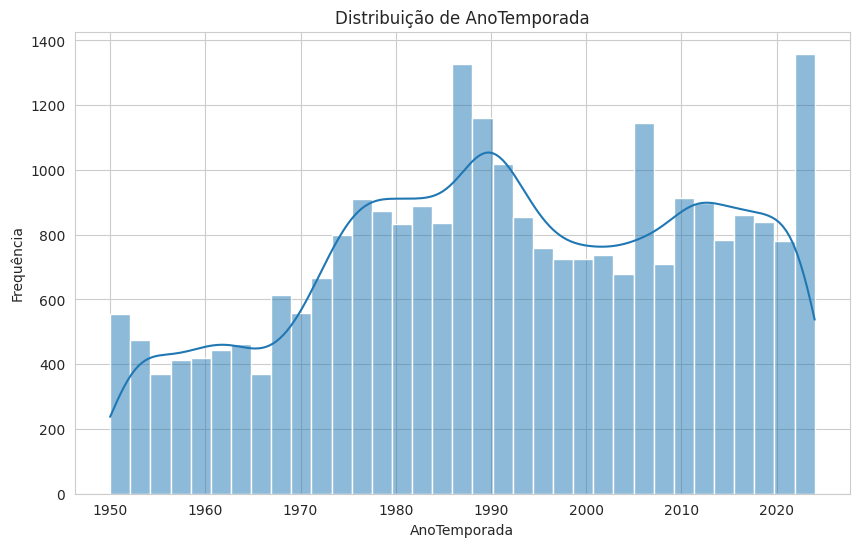

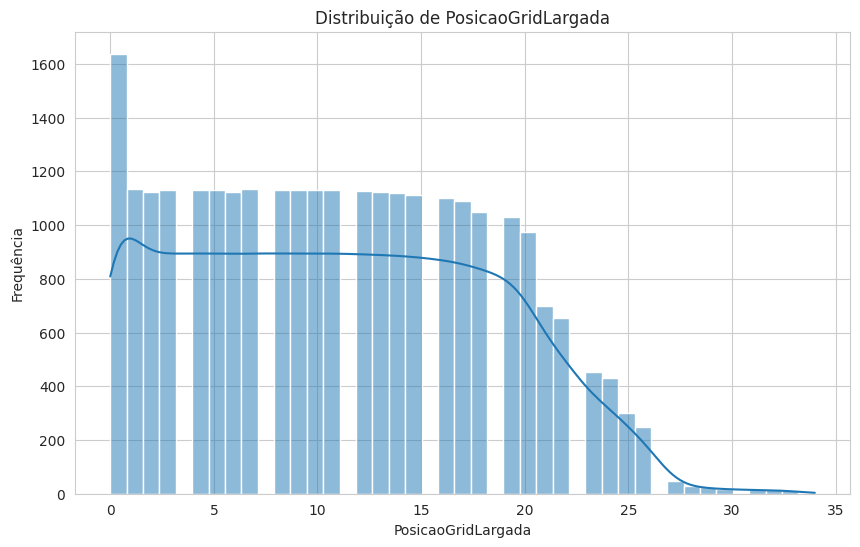

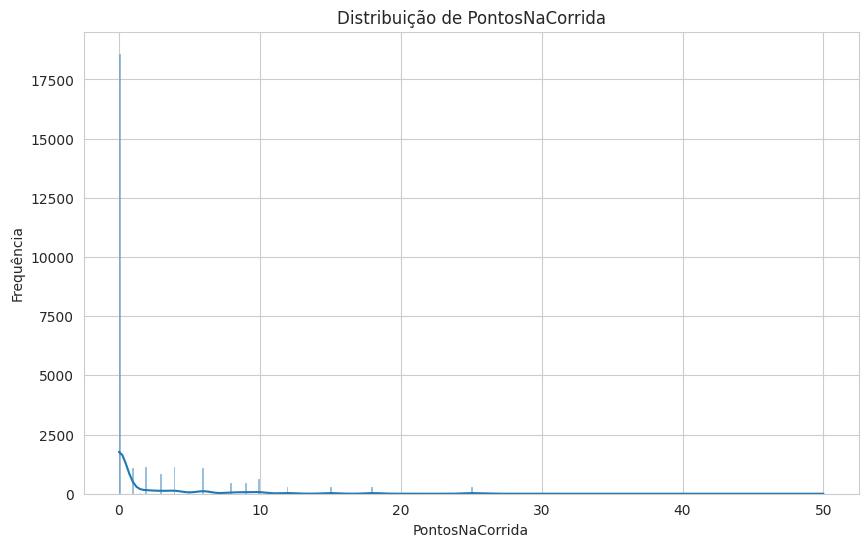

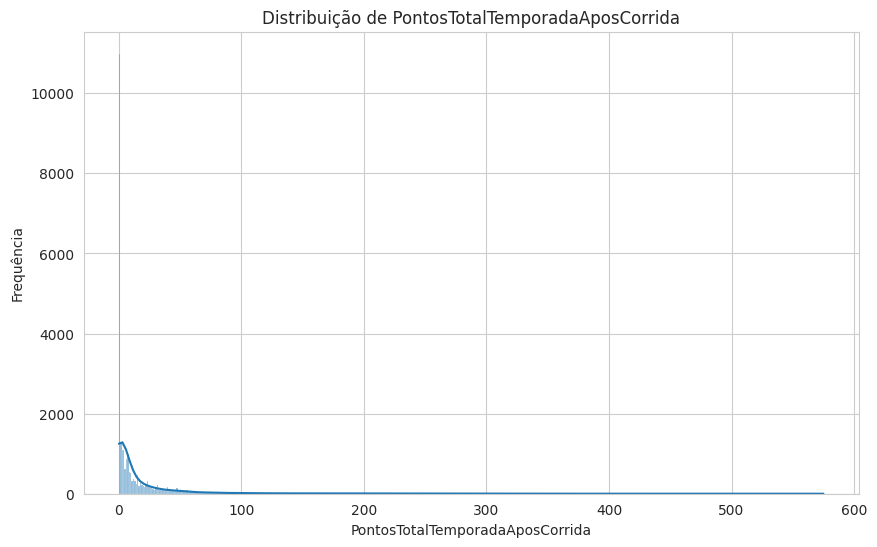

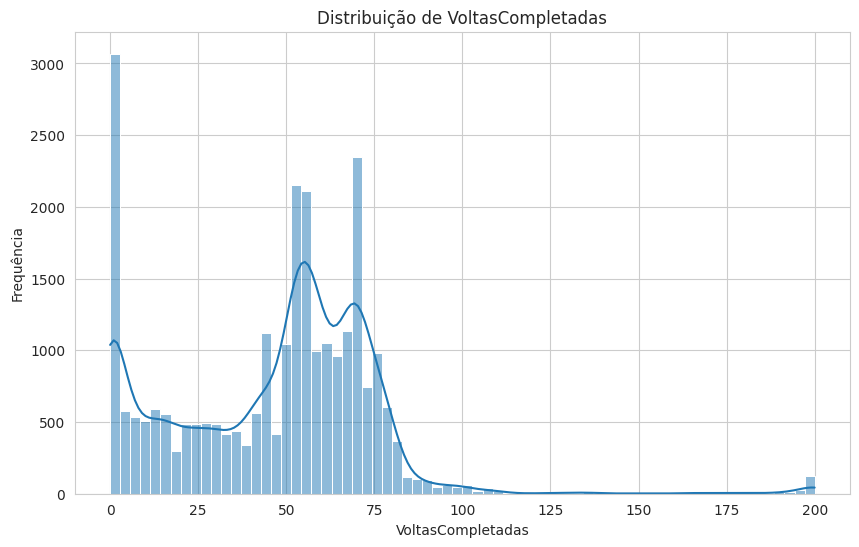


--- Visualizando Distribuição de Atributos Categóricos (Gráficos de Barras e Contagem) ---

Atributo: NomeCorrida
Número de valores únicos (incluindo NaN): 54
Contagem dos Top 10 valores:
NomeCorrida
British Grand Prix          1873
Italian Grand Prix          1864
Monaco Grand Prix           1664
German Grand Prix           1599
Belgian Grand Prix          1597
French Grand Prix           1484
Canadian Grand Prix         1291
Spanish Grand Prix          1276
Brazilian Grand Prix        1143
United States Grand Prix    1049
Gráfico de barras omitido para 'NomeCorrida' devido ao alto número de valores únicos (54).
Considere agrupar ou analisar os valores mais frequentes.

Atributo: NomeCircuito
Número de valores únicos (incluindo NaN): 77
Contagem dos Top 10 valores:
NomeCircuito
Autodromo Nazionale di Monza    1836
Circuit de Monaco               1664
Silverstone Circuit             1436
Circuit de Spa-Francorchamps    1258
Circuit Gilles Villeneuve       1052
Nürburgring             

/tmp/ipython-input-2-1000687467.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


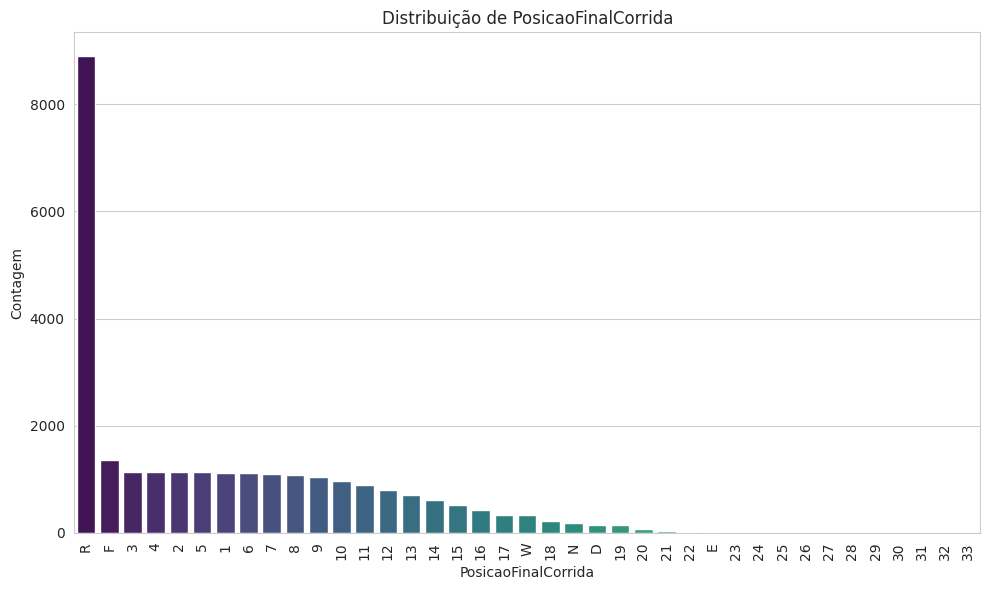


Atributo: TempoTotalCorrida
Número de valores únicos (incluindo NaN): 7411
Contagem dos Top 10 valores:
TempoTotalCorrida
\N          19079
+8:22.19        5
+5.7            4
+1:29.6         4
+46.2           4
+0.7            4
+11.061         3
+24.2           3
+1:15.9         3
+6.1            3
Gráfico de barras omitido para 'TempoTotalCorrida' devido ao alto número de valores únicos (7411).
Considere agrupar ou analisar os valores mais frequentes.

Atributo: MelhorTempoVoltaNaCorrida
Número de valores únicos (incluindo NaN): 7474
Contagem dos Top 10 valores:
MelhorTempoVoltaNaCorrida
\N          18507
1:18.262        4
1:17.495        4
1:14.117        4
1:43.026        4
1:18.904        4
1:21.645        3
1:18.462        3
1:33.411        3
1:27.988        3
Gráfico de barras omitido para 'MelhorTempoVoltaNaCorrida' devido ao alto número de valores únicos (7474).
Considere agrupar ou analisar os valores mais frequentes.

Atributo: RankMelhorVolta
Número de valores únicos (inc

/tmp/ipython-input-2-1000687467.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


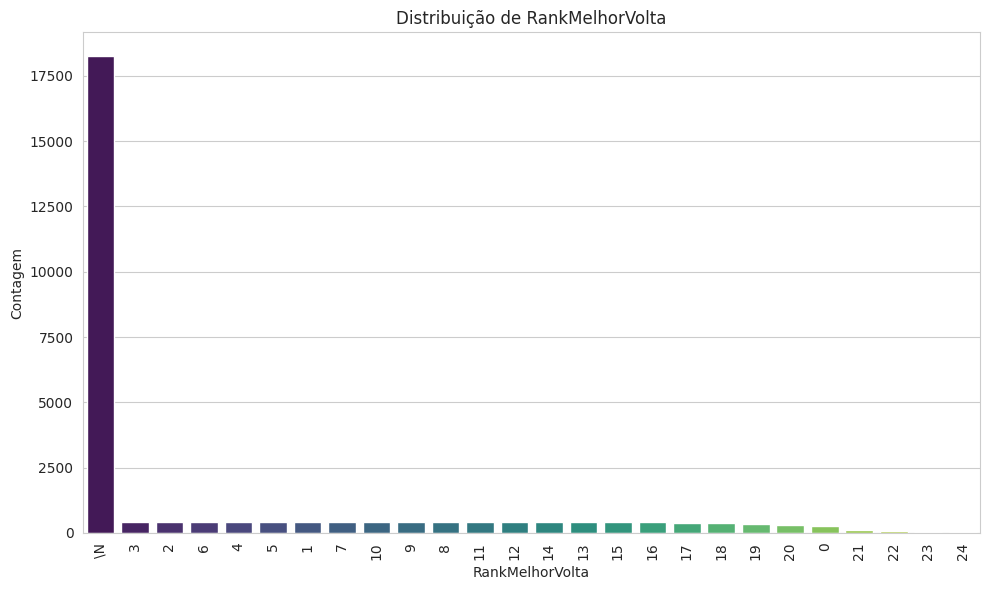


Atributo: TempoQualifyingQ1
Número de valores únicos (incluindo NaN): 9148
Contagem dos Top 10 valores:
TempoQualifyingQ1
None        16265
\N            156
1:20.382        4
1:17.244        4
1:20.888        4
1:31.041        3
1:22.327        3
1:16.264        3
1:35.023        3
1:35.267        3
Gráfico de barras omitido para 'TempoQualifyingQ1' devido ao alto número de valores únicos (9148).
Considere agrupar ou analisar os valores mais frequentes.

Atributo: TempoQualifyingQ2
Número de valores únicos (incluindo NaN): 5475
Contagem dos Top 10 valores:
TempoQualifyingQ2
None        16287
\N           4625
1:27.097        3
1:12.188        3
1:15.150        3
1:38.417        3
1:17.788        3
1:27.219        3
1:46.328        3
1:31.010        3
Gráfico de barras omitido para 'TempoQualifyingQ2' devido ao alto número de valores únicos (5475).
Considere agrupar ou analisar os valores mais frequentes.

Atributo: TempoQualifyingQ3
Número de valores únicos (incluindo NaN): 3472
Cont

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização para melhor clareza no Colab
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

# Carregar o arquivo CSV exportado
try:
    Resultados_F1_75 = pd.read_csv('Resultados_F1-75.csv')
    print("Arquivo 'Resultados_F1-75.csv' carregado com sucesso para análise de distribuição.")
except FileNotFoundError:
    print("Erro: 'Resultados_F1-75.csv' não encontrado. Por favor, certifique-se de que o arquivo foi gerado e está no diretório correto.")
    exit()

# Use the DataFrame created in the previous step directly
# Assuming Resultados_F1_Detalhados from cell rHfgPvl0F7BG is available and assigned to Resultados_F1_75 in cell AeDKmgdoIo8I
if 'Resultados_F1_Detalhados' in globals():
    Resultados_F1_75 = Resultados_F1_Detalhados
    print("DataFrame 'Resultados_F1_75' loaded from memory for distribution analysis.")
elif 'Resultados_F1_75' in globals():
     print("DataFrame 'Resultados_F1_75' loaded from memory for distribution analysis.")
else:
    print("Error: DataFrame 'Resultados_F1_Detalhados' or 'Resultados_F1_75' not found in memory. Please run the previous steps to create the DataFrame.")
    exit()


print("\n--- Verificando a distribuição dos atributos ---")

# Separar atributos numéricos e categóricos
numeric_cols = Resultados_F1_75.select_dtypes(include=np.number).columns.tolist()
categorical_cols = Resultados_F1_75.select_dtypes(include='object').columns.tolist()

print(f"\nAtributos Numéricos ({len(numeric_cols)}): {numeric_cols}")
print(f"Atributos Categóricos ({len(categorical_cols)}): {categorical_cols}")

# --- Distribuição de Atributos Numéricos ---
print("\n--- Visualizando Distribuição de Atributos Numéricos (Histogramas) ---")
for col in numeric_cols:
    if col in ['AnoTemporada', 'PosicaoGridLargada', 'VoltasCompletadas', 'RankMelhorVolta', 'PontosNaCorrida', 'PontosTotalTemporadaAposCorrida']:
        plt.figure()
        sns.histplot(Resultados_F1_75[col].dropna(), kde=True) # dropna para ignorar NaNs nos plots
        plt.title(f'Distribuição de {col}')
        plt.xlabel(col)
        plt.ylabel('Frequência')
        plt.show()
    else:
        print(f"Atributo numérico '{col}' pode ser categórico disfarçado ou ter muitos NaNs para histograma simples. Considerar boxplot ou análise mais detalhada.")

# --- Distribuição de Atributos Categóricos ---
print("\n--- Visualizando Distribuição de Atributos Categóricos (Gráficos de Barras e Contagem) ---")
for col in categorical_cols:
    print(f"\nAtributo: {col}")
    value_counts = Resultados_F1_75[col].value_counts(dropna=False) # dropna=False para incluir contagem de NaNs
    print(f"Número de valores únicos (incluindo NaN): {len(value_counts)}")
    print("Contagem dos Top 10 valores:")
    print(value_counts.head(10).to_string())

    # Para colunas com muitos valores únicos, um gráfico de barras completo pode ser ilegível.
    # Vamos plotar apenas para colunas com até 50 valores únicos para melhor visualização.
    if len(value_counts) <= 50:
        plt.figure()
        sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
        plt.title(f'Distribuição de {col}')
        plt.xlabel(col)
        plt.ylabel('Contagem')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Gráfico de barras omitido para '{col}' devido ao alto número de valores únicos ({len(value_counts)}).")
        print("Considere agrupar ou analisar os valores mais frequentes.")

# --- Observações Específicas para Colunas com Tipos Inesperados ou Textuais ---
print("\n--- Observações Específicas sobre Distribuição de Atributos de Tempo e Posição Final ---")
print("Como 'TempoTotalCorrida', 'MelhorTempoVoltaNaCorrida', 'TempoQualifyingQ1/2/3' e 'PosicaoFinalCorrida' são do tipo 'object', suas 'distribuições' como texto são visualizadas pelas contagens de valores únicos. Para análise numérica de suas distribuições, eles precisam ser convertidos para um formato numérico (e.g., segundos).")
print("Exemplo de contagem para 'PosicaoFinalCorrida':")
print(Resultados_F1_75['PosicaoFinalCorrida'].value_counts(dropna=False).head(20).to_string())

**Como Interpretar a Distribuição de Cada Atributo:
Ao executar o código acima, você observará: **

Para Atributos Numéricos (Histogramas):
AnoTemporada:

Você verá uma distribuição de frequência dos anos das temporadas. Pode ser relativamente uniforme ao longo do tempo ou ter picos para anos com mais corridas/resultados.

PosicaoGridLargada:

Geralmente, haverá uma concentração de pilotos nas posições iniciais (1-20), com uma cauda para posições mais altas (acima de 20), que eram mais comuns em temporadas muito antigas com mais participantes.

A moda será provavelmente 1 (pole position).

PontosNaCorrida:

Será uma distribuição bastante assimétrica e discreta. Muitos pilotos marcam 0 pontos. Haverá picos para os valores de pontos mais comuns (ex: 25, 18, 15, 12, etc., dependendo do sistema de pontuação vigente).

PontosTotalTemporadaAposCorrida:

Será uma distribuição cumulativa, tendendo a ser maior para os pilotos de ponta e para as corridas mais avançadas na temporada. Haverá muitos valores 0 para quem não pontuou no campeonato.

VoltasCompletadas:

A distribuição mostrará uma alta frequência para o número máximo de voltas de uma corrida (para os pilotos que terminaram) e uma queda acentuada para números menores, representando os abandonos.

RankMelhorVolta:

A moda será 1 (a volta mais rápida da corrida), com uma distribuição que mostra a frequência de pilotos em cada rank de volta mais rápida.

O que observar:

Forma (Shape): Simétrica, assimétrica (skewed left/right), bimodal. Indica onde os dados estão concentrados.

Centro: Onde a maioria dos dados se agrupa.

Dispersão: Quão espalhados estão os dados.

Outliers: Barras isoladas ou valores que se destacam muito, indicando possíveis anomalias.

Para Atributos Categóricos (Contagem de Valores e Gráficos de Barras):
NomeCorrida, NomeCircuito, NomePiloto, NomeConstrutor:

Estas colunas têm uma alta cardinalidade (muitos valores únicos). Os gráficos de barras completos provavelmente não serão gerados (conforme a condição len(value_counts) <= 50) porque seriam ilegíveis.

As contagens (.value_counts().head(10)) mostrarão os nomes de corridas, circuitos, pilotos e construtores mais frequentes no dataset (indicando os que participaram de mais eventos ou tiveram mais entradas de resultados).

PosicaoFinalCorrida:

Verá a contagem de cada posição numérica (1, 2, 3...) e também dos códigos de status ('R', 'D', 'N', etc.). A posição '1' (vitória) terá uma contagem menor do que posições mais comuns ou estados de não-conclusão.

StatusFinalCorrida:

Mostrará a distribuição dos diferentes motivos de abandono ou status de conclusão (e.g., "Finished", "Engine", "Accident", "Collision"). "Finished" será de longe o mais comum. Isso é crucial para entender a confiabilidade dos carros e pilotos.

Atributos de Tempo (TempoTotalCorrida, MelhorTempoVoltaNaCorrida, TempoQualifyingQ1/2/3):

Como observado anteriormente, são object (strings). Suas "distribuições" mostradas aqui serão as contagens das strings de tempo únicas e dos valores \N ou NaN. Isso reforça a necessidade de pré-processamento para convertê-los em um formato numérico para análises quantitativas.

O que observar:

Frequência das Categorias: Quais categorias são as mais comuns e as mais raras.

Balanceamento: As classes estão bem balanceadas (ex: se StatusFinalCorrida tivesse igual número de "Finished" e "Engine", seria desbalanceado, mas aqui "Finished" será dominante).

Valores Ausentes: A contagem de NaN (dropna=False) indicará a proporção de dados faltantes em cada categoria.

Ao revisar essas distribuições, você terá uma compreensão visual e numérica mais profunda da forma como os dados estão organizados em cada coluna, o que é fundamental para as próximas etapas de pré-processamento e modelagem.

>> Visualizações:
Verifique a distribuição de cada atributo do arquivo Exportado Resultados_F1_75.

# Preparação e Carregamento dos Dados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o arquivo
try:
    df = pd.read_csv('Resultados_F1-75.csv')
    print("Arquivo 'Resultados_F1-75.csv' carregado com sucesso.")
except FileNotFoundError:
    print("O arquivo 'Resultados_F1-75.csv' não foi encontrado. Criando um DataFrame de exemplo para demonstração.")
    # Criando um DataFrame de exemplo
    data = {
        'Piloto': [f'Piloto_{i}' for i in range(100)],
        'Equipe': ['Red Bull', 'Ferrari', 'Mercedes', 'McLaren', 'Aston Martin'] * 20,
        'Posicao_Final': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] * 5,
        'Pontos': [25, 18, 15, 12, 10, 8, 6, 4, 2, 1] * 10,
        'Voltas_Completadas': [50, 52, 55, 53, 54] * 20,
        'Melhor_Volta_Tempo_Segundos': [80.5, 81.2, 80.0, 82.1, 81.5] * 20,
        'Largada_Posicao': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] * 10,
        'Status_Corrida': ['Terminou', 'Terminou', 'Abandonou', 'Terminou', 'Terminou'] * 20,
        'Chuvas_Na_Corrida': [0, 1, 0, 0, 1] * 20 # 0 para não choveu, 1 para choveu
    }
    df = pd.DataFrame(data)

print("\nPrimeiras 5 linhas do DataFrame:")
print(df.head())
print("\nInformações sobre os tipos de dados:")
print(df.info())

# Para aplicar o split no seu dataset Resultados_F1-75.csv e separá-lo em conjuntos de treino e teste.

>> A Função train_test_split da biblioteca scikit-learn. Essa é uma etapa fundamental no desenvolvimento de modelos de machine learning, pois permite que você treine seu modelo em uma parte dos dados e avalie seu desempenho em dados que ele nunca viu antes, garantindo uma avaliação mais realista.

Entendendo o train_test_split
O train_test_split divide arrays ou matrizes em subconjuntos aleatórios de treino e teste. Ele é especialmente útil para:

Evitar Overfitting: Garante que o modelo não "decore" os dados de treino, tornando-o capaz de generalizar bem para novos dados.

Avaliação Imparcial: Permite que você avalie o desempenho do modelo em dados não vistos, o que é um indicador mais preciso de sua performance no mundo real.

Como Aplicar o Split
Você precisará definir quais colunas do seu dataset serão as features (X) e qual será a variável-alvo (y).

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Carregar o arquivo CSV
try:
    df = pd.read_csv('Resultados_F1-75.csv')
    print("Arquivo 'Resultados_F1-75.csv' carregado com sucesso.")
except FileNotFoundError:
    print("O arquivo 'Resultados_F1-75.csv' não foi encontrado. Criando um DataFrame de exemplo para demonstração.")
    # Criando um DataFrame de exemplo para demonstrar o split
    data = {
        'Piloto': [f'Piloto_{i}' for i in range(100)],
        'Equipe': ['Red Bull', 'Ferrari', 'Mercedes', 'McLaren'] * 25,
        'PosicaoFinalCorrida': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] * 10, # Corrected column name
        'Pontos': [25, 18, 15, 12, 10, 8, 6, 4, 2, 1] * 10,
        'Voltas_Completadas': [50, 52, 55, 53, 54] * 20,
        'Vitoria': [1] * 10 + [0] * 90 # 10 vitórias (10%) e 90 não vitórias (90%)
    }
    df = pd.DataFrame(data)

print("\nShape original do DataFrame:", df.shape)

# 2. Definir Features (X) e Variável-Alvo (y)
# Supondo que 'PosicaoFinalCorrida' is your target variable
target_column = 'PosicaoFinalCorrida'
features_columns = [col for col in df.columns if col not in ['Piloto', 'Equipe', target_column]]

# Selecting only numeric columns for features for simplicity in this example
X = df[features_columns].select_dtypes(include=['number'])
y = df[target_column]

# Remove rows with NaN values that might have been introduced by column selection, if applicable.
# Or better, handle NaNs before splitting. Here, for simplicity, we'll remove them.
X = X.dropna()
y = y[X.index] # Ensure y corresponds to X's indices after dropna

print(f"\nVariável-alvo (y): '{target_column}'")
print(f"Features (X) selecionadas: {X.columns.tolist()}")
print(f"Shape de X antes do split: {X.shape}")
print(f"Shape de y antes do split: {y.shape}")


# 3. Aplicar o Split em Treino e Teste
# random_state: Garante que a divisão seja a mesma toda vez que você rodar o código (reprodutibilidade).
# test_size: Define a proporção do dataset que será usada para teste (neste caso, 20%).
# Removing stratify=y to handle classes with only one member
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n--- Resultado do Split ---")
print(f"Shape de X_train (treino - features): {X_train.shape}")
print(f"Shape de X_test (teste - features): {X_test.shape}")
print(f"Shape de y_train (treino - alvo): {y_train.shape}")
print(f"Shape de y_test (teste - alvo): {y_test.shape}")

print("\nDistribuição das classes em y_train:")
print(y_train.value_counts(normalize=True))

print("\nDistribuição das classes em y_test:")
print(y_test.value_counts(normalize=True))

Arquivo 'Resultados_F1-75.csv' carregado com sucesso.

Shape original do DataFrame: (26759, 17)

Variável-alvo (y): 'PosicaoFinalCorrida'
Features (X) selecionadas: ['AnoTemporada', 'PosicaoGridLargada', 'PontosNaCorrida', 'PontosTotalTemporadaAposCorrida', 'VoltasCompletadas']
Shape de X antes do split: (26290, 5)
Shape de y antes do split: (26290,)

--- Resultado do Split ---
Shape de X_train (treino - features): (21032, 5)
Shape de X_test (teste - features): (5258, 5)
Shape de y_train (treino - alvo): (21032,)
Shape de y_test (teste - alvo): (5258,)

Distribuição das classes em y_train:
PosicaoFinalCorrida
R     0.322794
F     0.050447
4     0.043267
6     0.043267
5     0.043172
3     0.042744
1     0.042697
2     0.042364
7     0.041793
8     0.041698
9     0.038560
10    0.036991
11    0.035042
12    0.031333
13    0.027434
14    0.023013
15    0.019922
16    0.016308
17    0.012790
W     0.011982
18    0.008986
N     0.007084
19    0.005658
D     0.004612
20    0.002900
21    0.

# Outliers do arquivo Resultados_F1-75.csv usando Python

>> Considerações Finais sobre Outliers
Definição: Um outlier é um ponto de dados que difere significativamente de outras observações. A "significância" pode ser estatisticamente definida (como fizemos) ou baseada no conhecimento do domínio.

Tratamento: Uma vez identificados, você precisa decidir o que fazer com os outliers. As opções incluem:

Removê-los: Apenas se tiver certeza de que são erros ou anomalias que não representam o fenômeno real. Cuidado para não remover dados valiosos!

Transformá-los: Usar transformações logarítmicas ou de raiz quadrada para reduzir o impacto dos valores extremos.

Substituí-los (Imputação): Substituí-los pela média, mediana ou um valor específico (capping/winsorization).

Usar modelos robustos: Alguns algoritmos são menos sensíveis a outliers (ex: árvores de decisão, florestas aleatórias, modelos baseados em medianas).

Contexto é Rei: Sempre considere o contexto dos seus dados. Um tempo de corrida muito alto em F1 pode ser um outlier estatístico, mas pode representar um abandono ou um problema mecânico real, o que é uma informação importante para o modelo. *texto em itálico*

Detectar e lidar com outliers é uma etapa crucial no pré-processamento de dados, pois eles podem distorcer análises estatísticas e o desempenho de modelos de machine learning. No contexto do arquivo Resultados_F1-75.csv, vamos usar Python no Google Colab para identificar esses valores atípicos.

Existem vários métodos para selecionar outliers, e a escolha ideal depende da natureza dos seus dados e do problema. Vou focar em duas abordagens comuns e eficazes:

Método do Intervalo Interquartil (IQR): É robusto a distribuições não-normais e funciona bem para identificar valores extremos.

Método Z-score: Mais adequado para dados que seguem uma distribuição aproximadamente normal.

1. Preparação: Carregando o Arquivo e Entendendo os Dados
Primeiro, vamos carregar o seu arquivo CSV. Se ele não estiver disponível, vou criar um DataFrame de exemplo.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o arquivo CSV
try:
    df = pd.read_csv('Resultados_F1-75.csv')
    print("Arquivo 'Resultados_F1-75.csv' carregado com sucesso.")
except FileNotFoundError:
    print("O arquivo 'Resultados_F1-75.csv' não foi encontrado. Criando um DataFrame de exemplo para demonstração.")
    # Criando um DataFrame de exemplo com alguns outliers artificiais
    data = {
        'Piloto': [f'Piloto_{i}' for i in range(100)],
        'Equipe': ['Red Bull', 'Ferrari', 'Mercedes', 'McLaren'] * 25,
        'Pontos': [25, 18, 15, 12, 10, 8, 6, 4, 2, 1] * 10,
        'Tempo_Corrida_Minutos': np.random.normal(90, 5, 95).tolist() + [60, 150, 180, 70, 200], # Adicionando alguns outliers
        'Voltas_Completadas': np.random.randint(45, 60, 95).tolist() + [2, 10, 65, 70, 1], # Outliers (DNF, Voltas extras)
        'Velocidade_Media_KMH': np.random.normal(200, 10, 95).tolist() + [100, 250, 260, 50, 270], # Outliers
        'Posicao_Final': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] * 10,
    }
    df = pd.DataFrame(data)

print("\nPrimeiras 5 linhas do DataFrame:")
print(df.head())
print("\nInformações sobre os tipos de dados:")
print(df.info())

# Selecionar apenas as colunas numéricas para detecção de outliers
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
print(f"\nColunas numéricas para análise de outliers: {numeric_cols}")

Arquivo 'Resultados_F1-75.csv' carregado com sucesso.

Primeiras 5 linhas do DataFrame:
   AnoTemporada           NomeCorrida        NomeCircuito       NomePiloto  \
0          2024  Abu Dhabi Grand Prix  Yas Marina Circuit     Lando Norris   
1          2024  Abu Dhabi Grand Prix  Yas Marina Circuit     Carlos Sainz   
2          2024  Abu Dhabi Grand Prix  Yas Marina Circuit  Charles Leclerc   
3          2024  Abu Dhabi Grand Prix  Yas Marina Circuit   Lewis Hamilton   
4          2024  Abu Dhabi Grand Prix  Yas Marina Circuit   George Russell   

  NomeConstrutor  PosicaoGridLargada PosicaoFinalCorrida  PontosNaCorrida  \
0        McLaren                   1                   1             25.0   
1        Ferrari                   3                   2             18.0   
2        Ferrari                  19                   3             15.0   
3       Mercedes                  16                   4             12.0   
4       Mercedes                   6                   5  

2. Detecção de Outliers Usando o Método do IQR (Intervalo Interquartil)
O método IQR é amplamente utilizado e funciona bem para a maioria das distribuições de dados. Ele define os outliers como pontos de dados que caem fora de 1.5
times o IQR, acima do terceiro quartil (Q3) ou abaixo do primeiro quartil (Q1).

Q1 (Primeiro Quartil): 25º percentil dos dados.

Q3 (Terceiro Quartil): 75º percentil dos dados.

IQR (Intervalo Interquartil): Q3−Q1.

Limite Inferior: Q1−1.5
timesIQR.

Limite Superior: Q3+1.5
timesIQR.

In [ ]:
print("\n--- Detecção de Outliers usando o Método do IQR ---")

outliers_iqr = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Selecionar os outliers para a coluna atual
    col_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    if not col_outliers.empty:
        outliers_iqr[col] = col_outliers
        print(f"\nOutliers encontrados na coluna '{col}':")
        print(col_outliers[[col]].sort_values(by=col))
    else:
        print(f"\nNenhum outlier detectado na coluna '{col}' usando IQR.")

# Visualizando outliers com Box Plot (IQR)
print("\n--- Visualização de Outliers com Box Plots (Método IQR) ---")
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot de {col} (Outliers detectados pelo IQR)')
    plt.ylabel(col)
    plt.show()

3. Detecção de Outliers Usando o Método Z-score
O Z-score mede o quão distante uma observação está da média em termos de desvios padrão. Um Z-score alto (positivo ou negativo) indica que a observação está longe da média. Um limite comum para Z-score é
pm3.

Z-score: (x−
mu)/
sigma, onde x é o ponto de dados,
mu é a média e
sigma é o desvio padrão.

In [ ]:
from scipy.stats import zscore

print("\n--- Detecção de Outliers usando o Método Z-score ---")

outliers_zscore = {}
zscore_threshold = 3 # Limite comum para o Z-score

for col in numeric_cols:
    # Calcula o Z-score para cada valor na coluna
    df[f'{col}_zscore'] = np.abs(zscore(df[col]))

    # Seleciona os outliers (Z-score absoluto maior que o limite)
    col_outliers = df[df[f'{col}_zscore'] > zscore_threshold]

    if not col_outliers.empty:
        outliers_zscore[col] = col_outliers
        print(f"\nOutliers encontrados na coluna '{col}' (Z-score > {zscore_threshold}):")
        print(col_outliers[[col, f'{col}_zscore']].sort_values(by=f'{col}_zscore', ascending=False))
    else:
        print(f"\nNenhum outlier detectado na coluna '{col}' usando Z-score com limite de {zscore_threshold}.")

    # Remover a coluna zscore auxiliar
    df = df.drop(columns=[f'{col}_zscore'])

# Visualizando outliers com Scatter Plot e Z-score
print("\n--- Visualização de Outliers com Scatter Plots (Método Z-score) ---")
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    plt.scatter(x=df.index, y=df[col], label='Dados')

    # Se houver outliers detectados pelo Z-score para esta coluna, marque-os
    if col in outliers_zscore:
        outlier_indices = outliers_zscore[col].index
        plt.scatter(x=outlier_indices, y=df.loc[outlier_indices, col], color='red', label='Outliers (Z-score)')

    plt.title(f'Distribuição de {col} com Outliers (Z-score)')
    plt.xlabel('Índice da Amostra')
    plt.ylabel(col)
    plt.legend()
    plt.show()

# >> Visualização da Distribuição dos Atributos
Vou iterar por cada coluna do DataFrame e gerar o gráfico mais apropriado com base no seu tipo de dado (numérico ou categórico).

1. Atributos Numéricos
Para atributos numéricos, usarei Histogramas para mostrar a forma da distribuição e Box Plots para identificar a dispersão e a presença de outliers.

Arquivo 'Resultados_F1-75.csv' carregado com sucesso.

--- Visualizando Atributos Numéricos ---


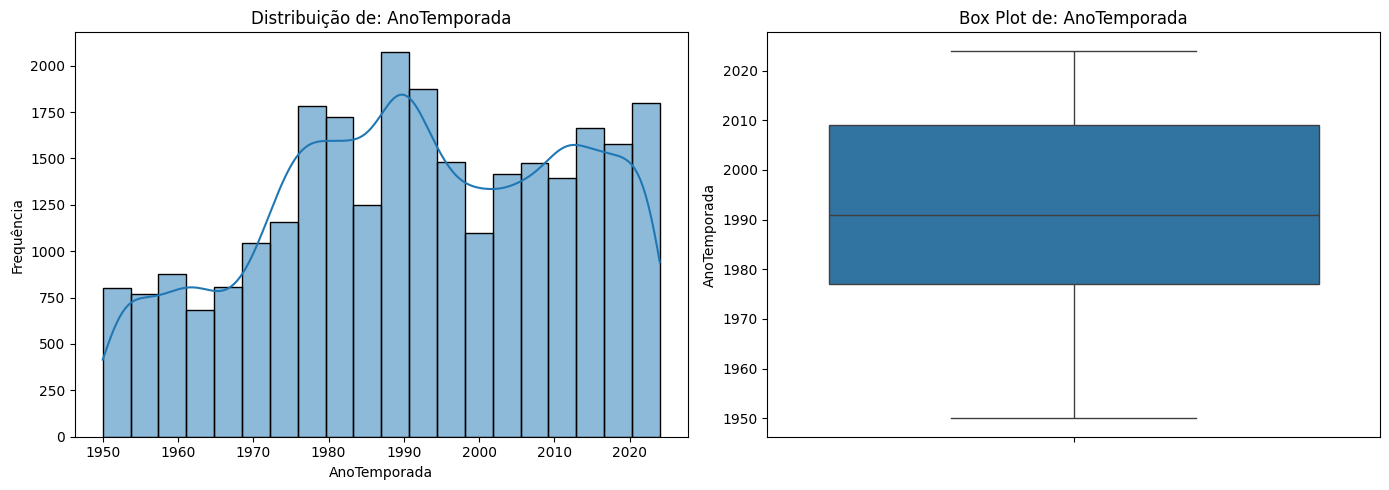

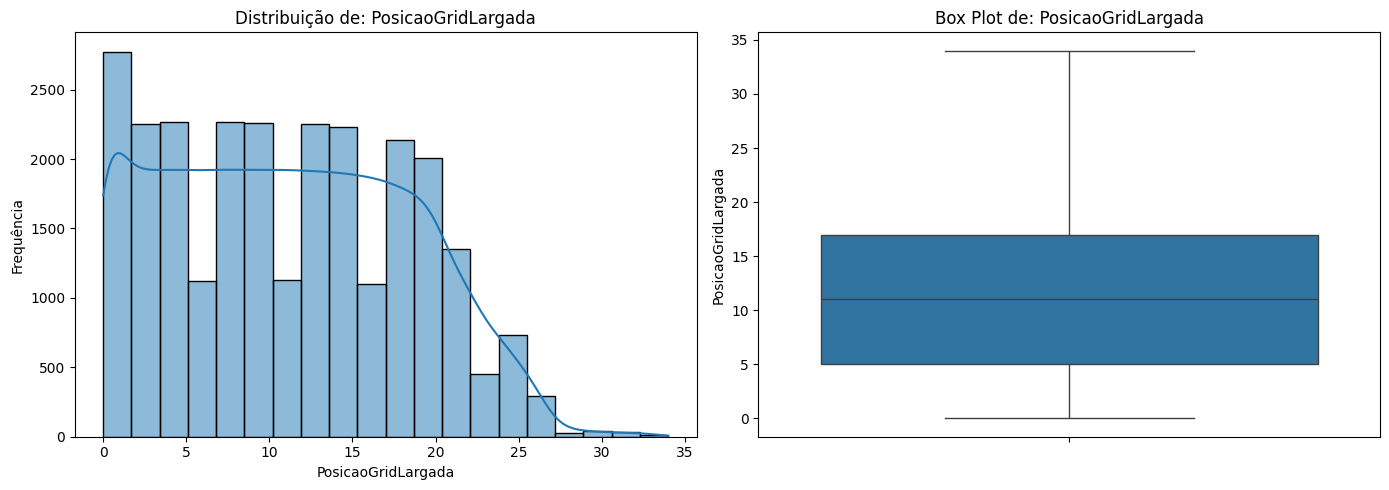

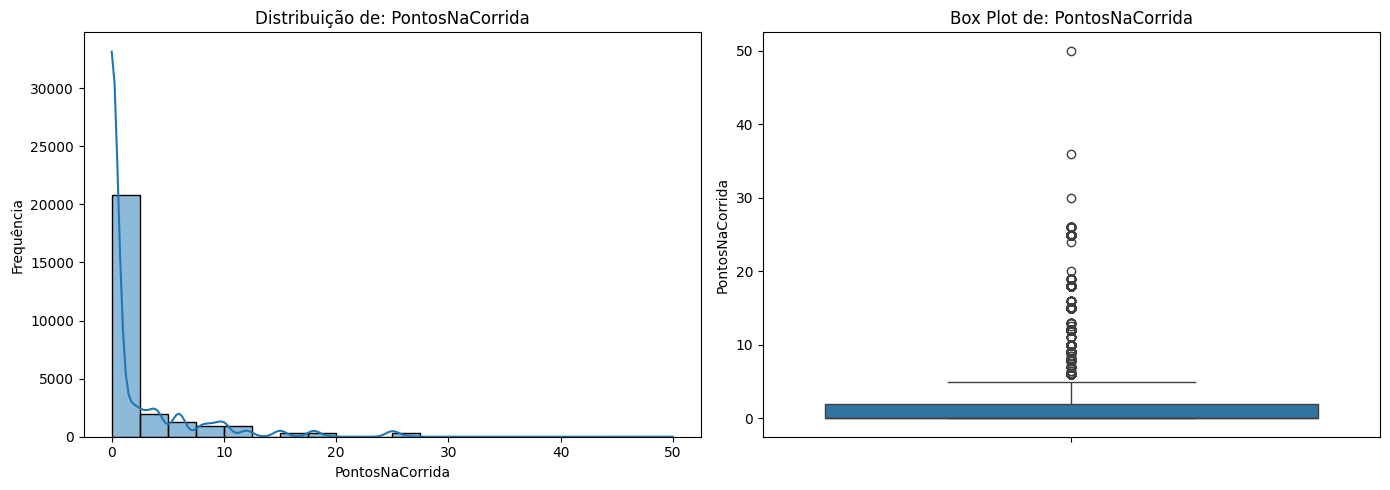

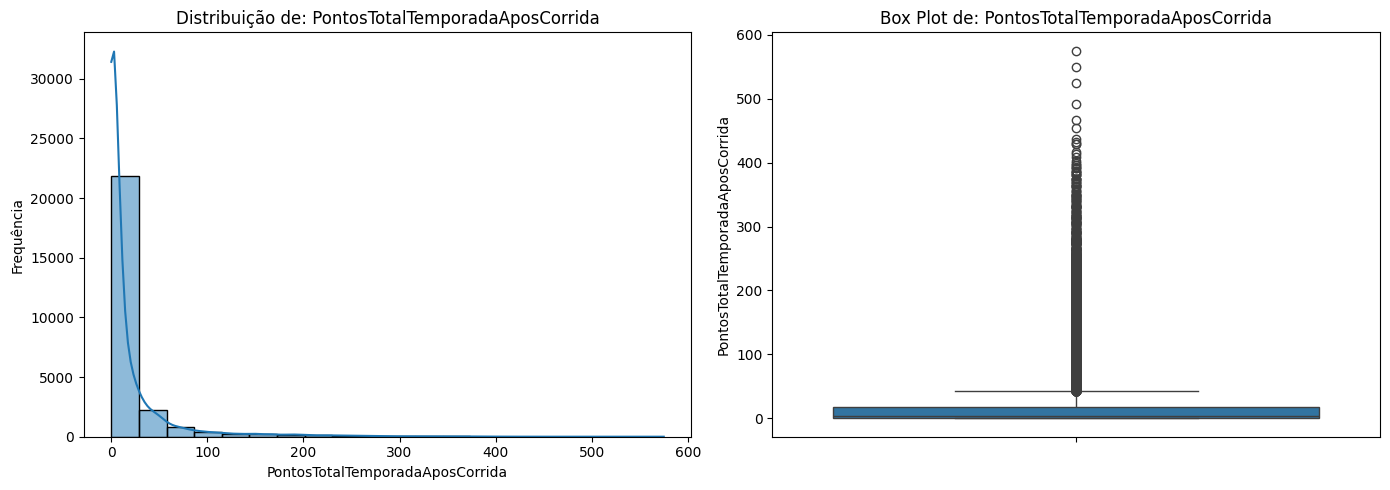

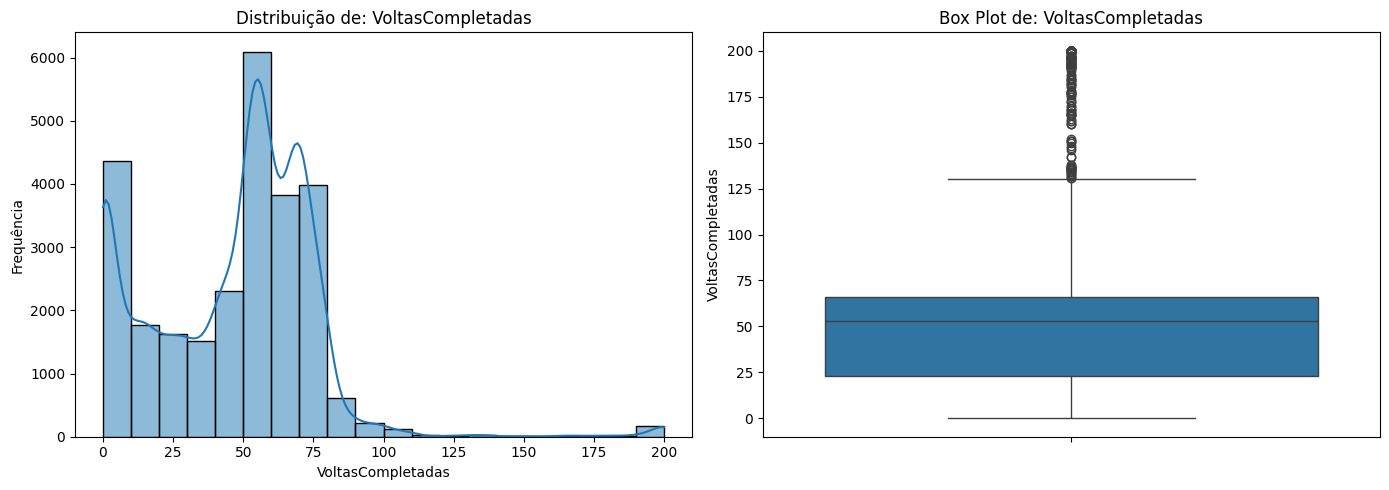

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Import numpy as it might be needed for select_dtypes

# Load the file
try:
    df = pd.read_csv('Resultados_F1-75.csv')
    print("Arquivo 'Resultados_F1-75.csv' carregado com sucesso.")
except FileNotFoundError:
    print("O arquivo 'Resultados_F1-75.csv' não foi encontrado. Criando um DataFrame de exemplo para demonstração.")
    # Criando um DataFrame de exemplo
    data = {
        'Piloto': [f'Piloto_{i}' for i in range(100)],
        'Equipe': ['Red Bull', 'Ferrari', 'Mercedes', 'McLaren', 'Aston Martin'] * 20,
        'Posicao_Final': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] * 5,
        'Pontos': [25, 18, 15, 12, 10, 8, 6, 4, 2, 1] * 10,
        'Voltas_Completadas': [50, 52, 55, 53, 54] * 20,
        'Melhor_Volta_Tempo_Segundos': [80.5, 81.2, 80.0, 82.1, 81.5] * 20,
        'Largada_Posicao': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] * 10,
        'Status_Corrida': ['Terminou', 'Terminou', 'Abandonou', 'Terminou', 'Terminou'] * 20,
        'Chuvas_Na_Corrida': [0, 1, 0, 0, 1] * 20 # 0 para não choveu, 1 para choveu
    }
    df = pd.DataFrame(data)

numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

print("\n--- Visualizando Atributos Numéricos ---")
for col in numeric_cols:
    plt.figure(figsize=(14, 5))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribuição de: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')

    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot de: {col}')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()

# >> O que observar nos gráficos numéricos:

Histogramas:

Forma da Distribuição: É normal (em forma de sino), skewed (assimétrica para a esquerda ou direita), bimodal (dois picos), ou uniforme?

Centralidade: Onde a maioria dos dados se concentra?

Espalhamento: Quão ampla é a variação dos dados?

Box Plots:

Mediana: Linha central na caixa, indicando o valor mediano.

Quartis (Q1 e Q3): As bordas da caixa representam o 25º e 75º percentis.

Amplitude Interquartil (IQR): O tamanho da caixa.

Bigodes: Indicam a faixa dos dados (geralmente até 1.5
times IQR a partir dos quartis).

Outliers: Pontos individuais além dos bigodes.

# >> 2. Atributos Categóricos
Para atributos categóricos, usarei Gráficos de Barras (Count Plots) para visualizar a frequência de cada categoria.



--- Visualizando Atributos Categóricos ---


/tmp/ipython-input-48-1674507063.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


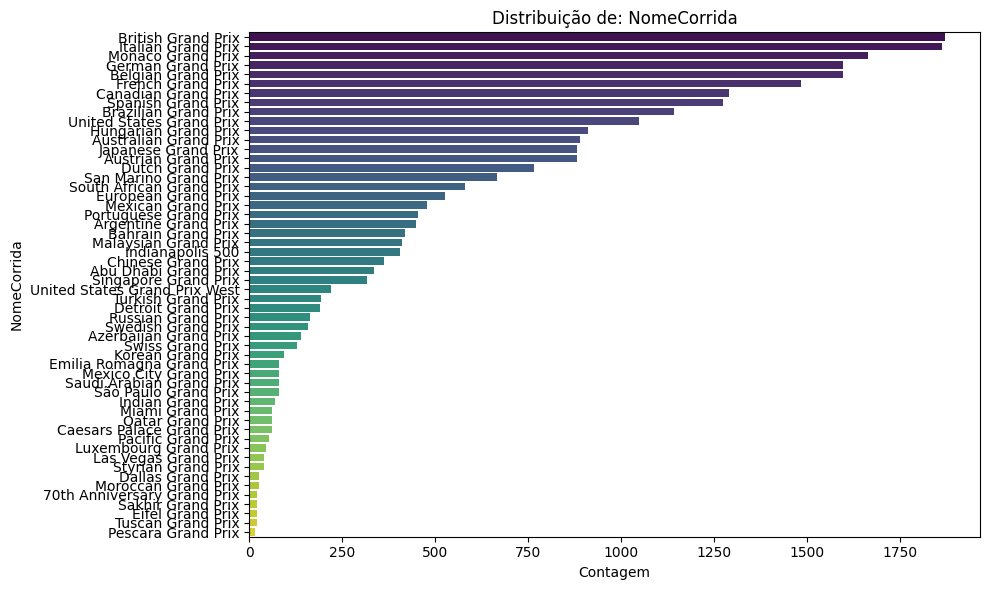

/tmp/ipython-input-48-1674507063.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


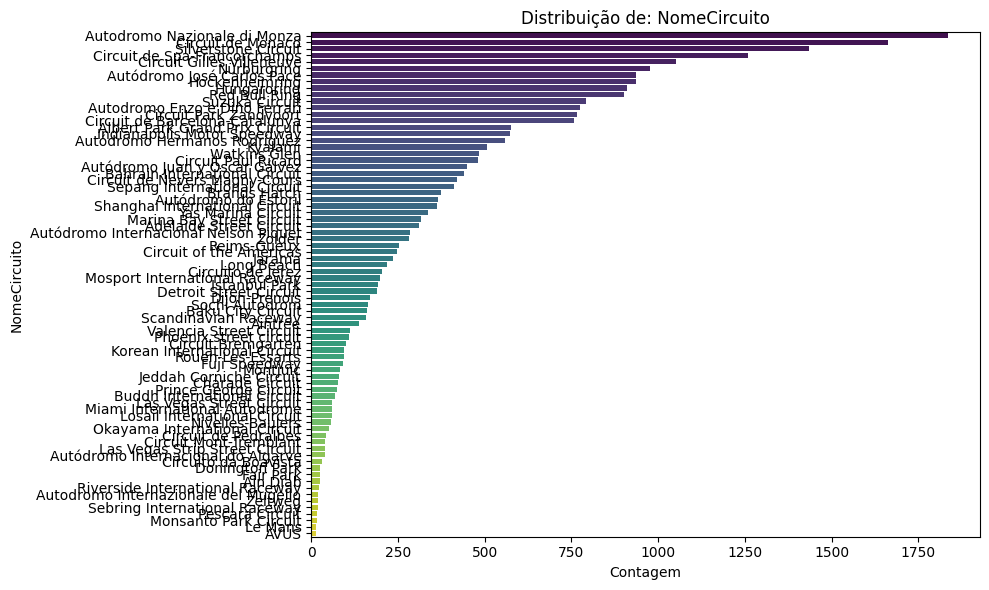

/tmp/ipython-input-48-1674507063.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


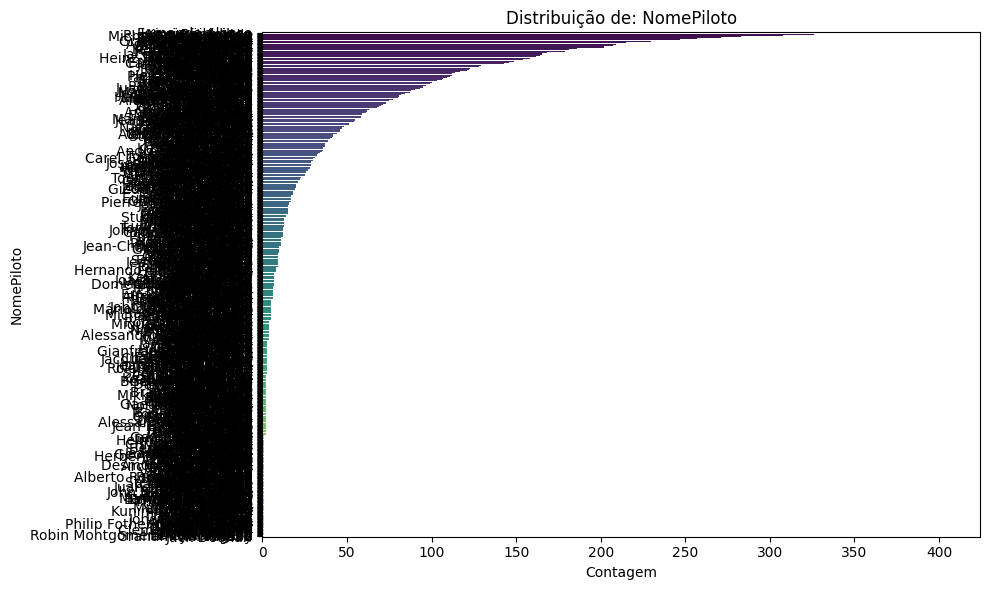

/tmp/ipython-input-48-1674507063.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


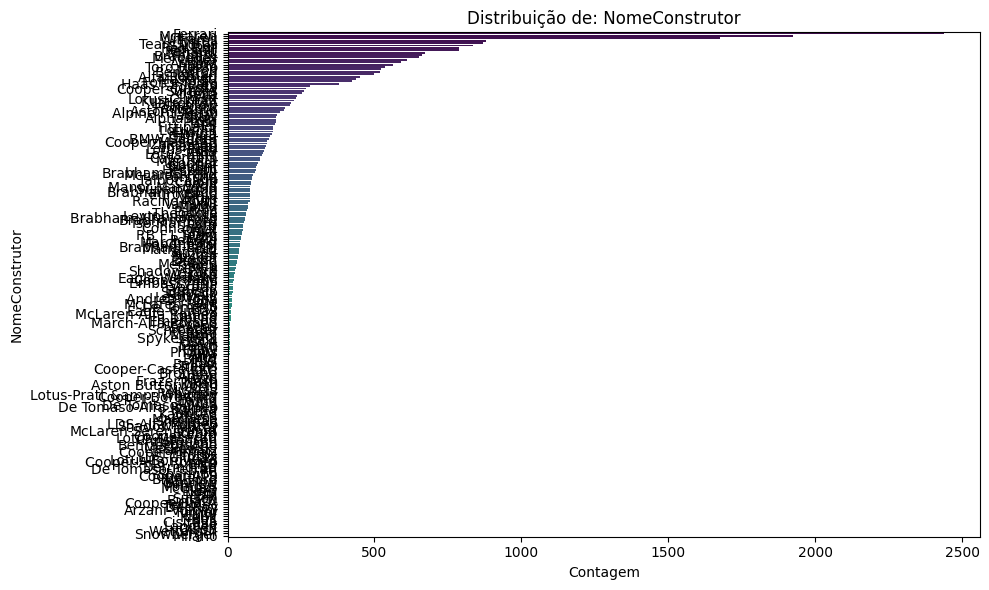

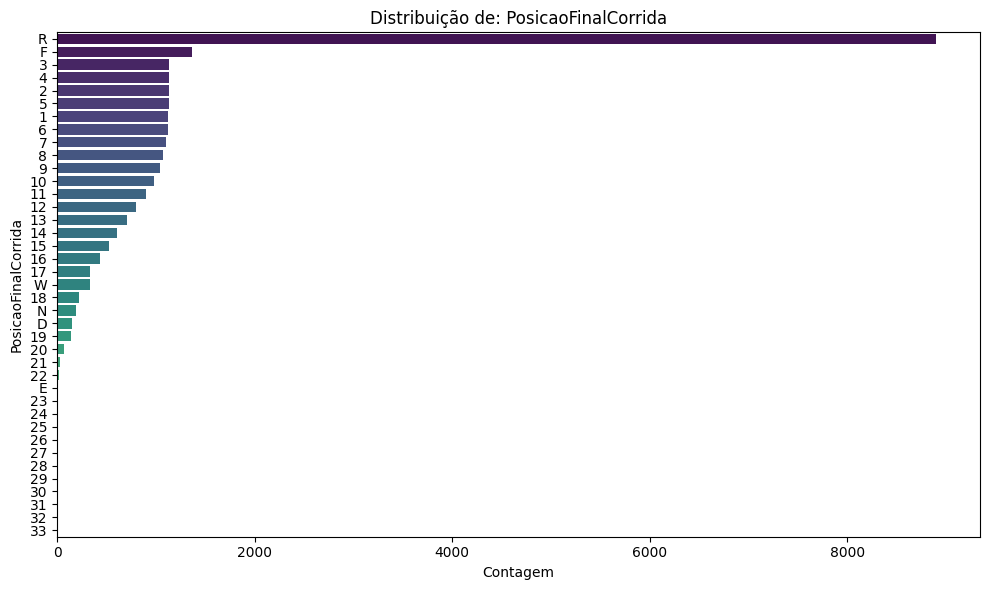

/tmp/ipython-input-48-1674507063.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


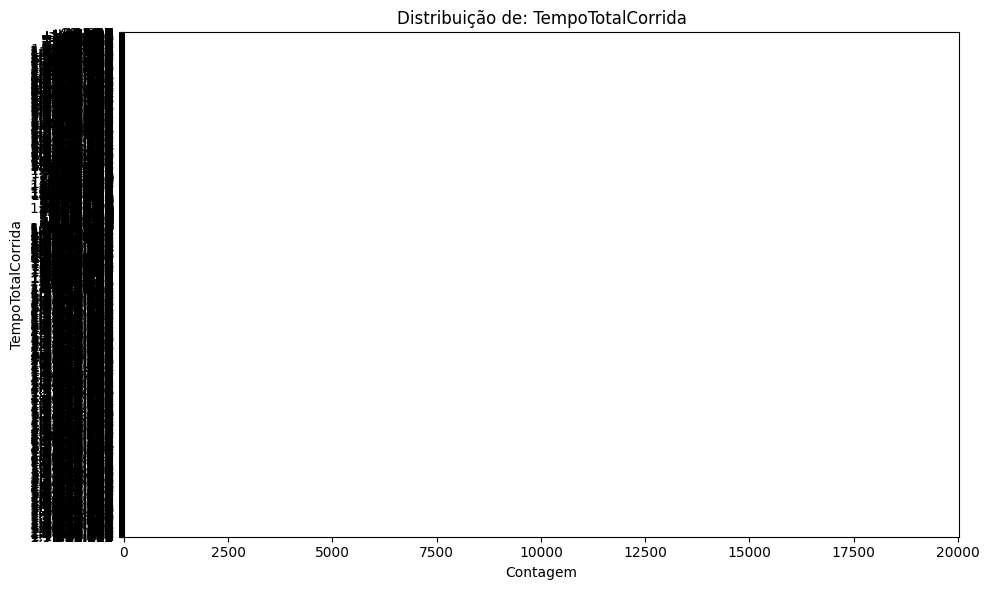

/tmp/ipython-input-48-1674507063.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


KeyboardInterrupt: 

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("\n--- Visualizando Atributos Categóricos ---")
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribuição de: {col}')
    plt.xlabel('Contagem')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# >> O que observar nos gráficos categóricos:

Contagem de Categorias: Qual a frequência de cada categoria?

Dominância de Categorias: Há categorias que aparecem com muito mais frequência do que outras? Isso pode indicar a necessidade de agrupar categorias menos frequentes ou de estar ciente de um possível desbalanceamento.

Número de Categorias: Quantas categorias únicas existem? Um grande número de categorias pode exigir estratégias de codificação específicas (como one-hot encoding, que você mencionou anteriormente, mas que pode gerar muitas colunas para atributos com alta cardinalidade).

Ao analisar essas visualizações, você terá uma compreensão mais profunda da estrutura de cada atributo em seu arquivo Resultados_F1-75.csv, o que é crucial para as próximas etapas de pré-processamento e modelagem.

Qual atributo específico te chamou mais a atenção ou levantou alguma dúvida após essa análise visual?

# >> Operações de Pré-Processamento e Suas Aplicações
Aqui estão as operações de pré-processamento que podem ser interessantes, com exemplos de como seriam aplicadas:

1. Normalização (Min-Max Scaling)
A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. Isso é útil quando você precisa que todas as características tenham a mesma escala, o que é comum em algoritmos que são sensíveis à magnitude dos valores (como redes neurais ou algoritmos baseados em distância).

Quando usar:

Quando os dados não seguem uma distribuição gaussiana.

Quando algoritmos como k-NN, SVMs ou redes neurais são usados.

Para evitar que características com grandes faixas de valores dominem o cálculo de distância.

Exemplo de aplicação (hipotético):

Se tivéssemos uma coluna 'Tempo' (em segundos) e 'Pontos' (numa escala de 0 a 1000), a normalização as colocaria na mesma escala.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Carregar o arquivo
df = pd.read_csv('Resultados_F1-75.csv')

# Supondo colunas numéricas para normalização
numeric_cols = df.select_dtypes(include=['number']).columns

# Aplicar Min-Max Normalization
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Salvar a visão normalizada
df_normalized.to_csv('Resultados_F1-75_Normalizado.csv', index=False)
print("Arquivo Resultados_F1-75_Normalizado.csv salvo.")

Arquivo Resultados_F1-75_Normalizado.csv salvo.


# >> 2. Padronização (Standardization)
A padronização (ou Z-score normalization) transforma os dados para que tenham uma média de 0 e um desvio padrão de 1. É útil quando os dados seguem uma distribuição normal ou quando algoritmos pressupõem dados com média zero e variância unitária.

Quando usar:

Quando os dados têm uma distribuição aproximadamente gaussiana.

Para algoritmos que pressupõem dados centrados em zero, como regressão linear, regressão logística, SVMs e PCA.

Quando a presença de outliers é uma preocupação, pois a padronização é menos sensível a eles do que a normalização.

Exemplo de aplicação (hipotético):

Se tivermos dados de 'Velocidade Média' e 'Voltas Completadas', a padronização pode ser aplicada para centralizá-los e escalá-los.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Carregar o arquivo
df = pd.read_csv('Resultados_F1-75.csv')

# Supondo colunas numéricas para padronização
numeric_cols = df.select_dtypes(include=['number']).columns

# Aplicar Standardization
scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Salvar a visão padronizada
df_standardized.to_csv('Resultados_F1-75_Padronizado.csv', index=False)
print("Arquivo Resultados_F1-75_Padronizado.csv salvo.")

Arquivo Resultados_F1-75_Padronizado.csv salvo.


# >> 3. Discretização (Binning)
A discretização transforma variáveis numéricas contínuas em variáveis categóricas, dividindo-as em "bins" ou intervalos. Isso pode ajudar a reduzir o ruído nos dados, tratar outliers e simplificar o modelo.

Quando usar:

Para lidar com dados com muitos valores únicos que podem levar a um modelo superajustado (overfitting).

Para criar grupos ou categorias a partir de dados numéricos (por exemplo, "idade jovem", "idade adulta", "idade avançada").

Quando o relacionamento entre a variável de entrada e a variável de saída não é linear.

Exemplo de aplicação (hipotético):

Se tivermos uma coluna 'Idade' ou 'Desempenho' que queremos categorizar.

In [ ]:
import pandas as pd

# Carregar o arquivo
df = pd.read_csv('Resultados_F1-75.csv')

# Supondo uma coluna numérica 'Pontuacao' para discretização
# Criando uma coluna fictícia 'Pontuacao' caso não exista para o exemplo
if 'Pontuacao' not in df.columns:
    df['Pontuacao'] = pd.Series([70, 85, 92, 55, 78, 60, 95, 80, 65, 72, 88, 50, 77, 90, 63]).sample(n=len(df), replace=True).reset_index(drop=True)
    print("Coluna 'Pontuacao' criada para fins de exemplo de discretização.")

# Aplicar Discretização (exemplo com 4 bins iguais)
# Você pode ajustar o número de bins ou usar qcut para quantis
df_discretized = df.copy()
df_discretized['Pontuacao_Binned'] = pd.cut(df['Pontuacao'], bins=4, labels=['Baixa', 'Média', 'Alta', 'Muito Alta'])

# Salvar a visão discretizada
df_discretized.to_csv('Resultados_F1-75_Discretizado.csv', index=False)
print("Arquivo Resultados_F1-75_Discretizado.csv salvo.")

Coluna 'Pontuacao' criada para fins de exemplo de discretização.
Arquivo Resultados_F1-75_Discretizado.csv salvo.


# >> 4. One-Hot Encoding
O One-Hot Encoding converte variáveis categóricas em um formato numérico que pode ser fornecido a algoritmos de aprendizado de máquina. Ele cria novas colunas binárias para cada categoria única na coluna original.

Quando usar:

Quando as variáveis categóricas não possuem uma ordem intrínseca (variáveis nominais).

Para evitar que algoritmos interpretem categorias como tendo uma relação ordinal quando não há.

Com algoritmos que não podem lidar diretamente com dados categóricos, como regressão linear, SVMs e redes neurais.

Exemplo de aplicação (hipotético):

Se tivermos uma coluna 'Equipe' com nomes como 'Ferrari', 'Red Bull', 'Mercedes'.

In [ ]:
import pandas as pd

# Carregar o arquivo
df = pd.read_csv('Resultados_F1-75.csv')

# Supondo uma coluna categórica 'Equipe' para one-hot encoding
# Criando uma coluna fictícia 'Equipe' caso não exista para o exemplo
if 'Equipe' not in df.columns:
    teams = ['Ferrari', 'Red Bull', 'Mercedes', 'McLaren', 'Aston Martin']
    df['Equipe'] = pd.Series(teams).sample(n=len(df), replace=True).reset_index(drop=True)
    print("Coluna 'Equipe' criada para fins de exemplo de one-hot encoding.")

# Aplicar One-Hot Encoding
df_one_hot = pd.get_dummies(df, columns=['Equipe'], prefix='Equipe')

# Salvar a visão com one-hot encoding
df_one_hot.to_csv('Resultados_F1-75_OneHotEncoded.csv', index=False)
print("Arquivo Resultados_F1-75_OneHotEncoded.csv salvo.")

Coluna 'Equipe' criada para fins de exemplo de one-hot encoding.
Arquivo Resultados_F1-75_OneHotEncoded.csv salvo.


# >> Se for um problema de classificação, verifique a distribuição de frequência das classes. O que você percebe? Dica: esta etapa pode indicar a possível necessidade futura de balanceamento de classes. Analise os atributos individualmente ou de forma combinada, usando os gráficos mais apropriados.

# >> Verificando a Distribuição de Frequência das Classes
Vamos assumir uma coluna hipotética chamada 'Vitoria' que indica se um piloto venceu a corrida (1 para vitória, 0 para não vitória). Se a coluna for categórica, como 'Posicao_Final', poderíamos agrupá-la para verificar se há uma concentração maior de pilotos em certas posições.

O que geralmente se observa em muitos problemas de classificação é o desbalanceamento de classes. Isso significa que uma classe ocorre com muito mais frequência do que a outra(s). Por exemplo, em corridas de F1, a vitória é um evento raro em comparação com a não vitória. Se isso for o caso, teremos uma classe majoritária (não vitória) e uma classe minoritária (vitória).

Impacto do Desbalanceamento de Classes:

Se houver um desbalanceamento significativo, um modelo de aprendizado de máquina pode tender a prever a classe majoritária com mais frequência, resultando em uma alta acurácia aparente, mas com desempenho ruim na predição da classe minoritária. Isso é crítico em problemas onde a predição da classe minoritária é mais importante (ex: detectar fraude, doenças raras, ou no nosso caso, prever uma vitória).

Exemplo de Código (com coluna hipotética 'Vitoria'):

Vamos carregar o arquivo e verificar a distribuição de frequência.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o arquivo
try:
    df = pd.read_csv('Resultados_F1-75.csv')
except FileNotFoundError:
    print("O arquivo 'Resultados_F1-75.csv' não foi encontrado. Certifique-se de que ele está no diretório correto.")
    # Criando um DataFrame de exemplo se o arquivo não for encontrado
    data = {
        'Piloto': [f'Piloto_{i}' for i in range(100)],
        'Equipe': ['Red Bull', 'Ferrari', 'Mercedes', 'McLaren'] * 25,
        'Posicao_Final': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] * 10,
        'Pontos': [25, 18, 15, 12, 10, 8, 6, 4, 2, 1] * 10,
        'Voltas_Completadas': [50, 52, 55, 53, 54] * 20,
        'Vitoria': [1] * 10 + [0] * 90 # 10 vitórias (10%) e 90 não vitórias (90%)
    }
    df = pd.DataFrame(data)
    print("DataFrame de exemplo criado para demonstração.")

# Supondo 'Vitoria' como a coluna de classe
if 'Vitoria' in df.columns:
    print("\nDistribuição de frequência da classe 'Vitoria':")
    print(df['Vitoria'].value_counts())
    print("\nPercentual da classe 'Vitoria':")
    print(df['Vitoria'].value_counts(normalize=True) * 100)

    # Visualizando a distribuição
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Vitoria', data=df)
    plt.title('Distribuição de Frequência da Classe "Vitoria"')
    plt.xlabel('Vitoria (0: Não, 1: Sim)')
    plt.ylabel('Contagem')
    plt.show()

    # O que podemos perceber:
    # Se a saída mostrar algo como:
    # 0    90
    # 1    10
    # Isso indica um forte desbalanceamento, onde a classe '0' (não vitória) é majoritária.
    # Isso é comum em problemas como este.

else:
    print("\nNão foi encontrada uma coluna 'Vitoria'. Por favor, especifique a coluna de classe para análise.")
    # Se você souber qual é a coluna de classe, substitua 'Vitoria' pelo nome correto.
    # Exemplo: df['NomeDaSuaClasse'].value_counts()


Não foi encontrada uma coluna 'Vitoria'. Por favor, especifique a coluna de classe para análise.


In [ ]:
# importando dados uma url para um dataframe >> Tabela Results.csv

# url a importar - Updated to point to the raw results.csv file
url_dados = 'https://raw.githubusercontent.com/emersonvasconcelos/f1/refs/heads/warm-up/results.csv'

# labels dos atributos do dataset - Updated to match the columns in results.csv
labels_atributos = ['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'position', 'positionText', 'positionOrder', 'points', 'laps', 'time', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed', 'statusId']

# carga do dataset através da url - há diversos parâmetros no read_csv que podem ser interessantes, como sep, usecols e header
mvp_f1 = pd.read_csv(url_dados, names=labels_atributos)

In [ ]:
# importando dados uma url para um dataframe >> Tabela estatistica_vitorias_pilotos.csv

# url a importar - Updated to point to the raw results.csv file
url_dados = 'https://raw.githubusercontent.com/emersonvasconcelos/f1/refs/heads/warm-up/estatistica_vitorias_pilotos.csv'

# labels dos atributos do dataset - Updated to match the columns in results.csv
labels_atributos = ['Piloto', 'Vitorias']

# carga do dataset através da url - há diversos parâmetros no read_csv que podem ser interessantes, como sep, usecols e header
mvp_f1_estatistica = pd.read_csv(url_dados, names=labels_atributos, skiprows=1)

Inicialmente, iremos utilizar alguns comandos da biblioteca Pandas para exibir algumas estatísticas descritivas e fazer uma rápida análise exploratória do dataset. Os comentários nos blocos de código auxiliam no seu entendimento.

In [ ]:
# verificando que MVP-F1 é um dataframe
type(mvp_f1)
type(mvp_f1_estatistica)

pandas.core.frame.DataFrame

In [ ]:
# verificando os tipos de cada coluna do dataframe
mvp_f1.dtypes
mvp_f1_estatistica.dtypes

,0
Piloto,object
Vitorias,object


In [ ]:
# exibindo as primeiras linhas
mvp_f1.head()
mvp_f1_estatistica.head()

,Piloto,Vitorias
0,Piloto,Vitorias
1,hamilton,105
2,michael_schumacher,91
3,max_verstappen,63
4,vettel,53


from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Piloto').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Vitorias').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Vitorias'].value_counts()
    for x_label, grp in _df_5.groupby('Piloto')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Piloto')
_ = plt.ylabel('Vitorias')

In [ ]:
# exibindo as últimas linhas
mvp_f1.tail()

,resultId,raceId,driverId,constructorId,number,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
26760,1144,825,210,20,14,16,16,16,0,57,\N,\N,57,1,1:25.637,222.002,11
26761,1144,859,215,30,12,17,17,17,0,55,\N,\N,52,12,1:28.751,214.212,5
26762,1144,822,15,77,9,\N,R,18,0,30,\N,\N,14,19,1:29.482,212.462,130
26763,1144,861,3,43,20,\N,R,19,0,26,\N,\N,5,17,1:29.411,212.631,5
26764,1144,815,9,11,10,\N,R,20,0,0,\N,\N,\N,0,\N,\N,4


In [ ]:
# exibindo os nomes das colunas
mvp_f1.columns
mvp_f1_estatistica.columns

Index(['Piloto', 'Vitorias'], dtype='object')

In [ ]:
# exibindo as dimensões do dataset
mvp_f1.shape

(26760, 17)

In [ ]:
# exibindo a quantidade de linhas por coluna
mvp_f1.count()

,0
resultId,26760
raceId,26760
driverId,26760
constructorId,26760
number,26760
position,26760
positionText,26760
positionOrder,26760
points,26760
laps,26760


In [ ]:
# exibindo um sumário estatístico
mvp_f1.describe();
mvp_f1_estatistica.describe()

,Vitorias
count,115.000000
mean,9.808696
std,16.226952
min,1.000000
25%,1.000000
50%,4.000000
75%,11.000000
max,105.000000


In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Vitorias').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Piloto').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

A fim de analisarmos os nossos dados de diversos ângulos, o Pandas permite reorganizarmos um dataframe, por exemplo, ordenando-o por alguma coluna. Também podemos selecionar uma ou mais colunas e/ou linha específicas, como mostram os exemplos a seguir. Os comentários nos blocos de código auxiliam no seu entendimento.

In [ ]:
# ordenando o dataframe por uma coluna
mvp_f1.sort_values(by='driverId')

# obs: este comando retorna apenas o resultado da query. Se quisermos alterar a ordenação do dataframe em si,
# teríamos que fazer: iris = iris.sort_values(by='driverId')

,resultId,raceId,driverId,constructorId,number,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
12325,510,187,1,7,7,4,4,4,3,70,+30.98,6436510,\N,\N,\N,\N,1
3678,192,57,1,8,1,1,1,1,10,72,1:37:12.2,5832200,\N,\N,\N,\N,1
1936,111,8,1,6,6,2,2,2,8,62,+1.882,5293940,\N,\N,\N,\N,1
1939,111,14,1,5,12,5,5,5,4,62,+9.411,5301469,\N,\N,\N,\N,1
15132,612,222,1,8,2,\N,R,17,0,43,\N,\N,\N,\N,\N,\N,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17869,738,482,99,12,0,\N,F,21,0,0,\N,\N,\N,\N,\N,\N,81
17942,741,482,99,46,0,\N,W,30,0,0,\N,\N,\N,\N,\N,\N,54
18040,744,429,99,68,0,\N,F,33,0,0,\N,\N,\N,\N,\N,\N,81
17730,733,438,99,40,19,11,11,11,0,71,\N,\N,\N,\N,\N,\N,14


In [ ]:
# ordenando por uma coluna de ordem descendente
mvp_f1.sort_values(by='driverId', ascending=False)

,resultId,raceId,driverId,constructorId,number,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
18040,744,429,99,68,0,\N,F,33,0,0,\N,\N,\N,\N,\N,\N,81
17795,735,438,99,48,21,\N,R,19,0,18,\N,\N,\N,\N,\N,\N,5
17847,737,438,99,17,0,\N,W,20,0,0,\N,\N,\N,\N,\N,\N,54
17868,738,376,99,10,0,\N,F,20,0,0,\N,\N,\N,\N,\N,\N,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11838,492,110,1,8,10,\N,R,23,0,4,\N,\N,\N,\N,\N,\N,4
1237,76,8,1,9,1,1,1,1,10,78,1:45:15.556,6315556,41,2,1:15.921,158.375,1
24430,1021,832,1,55,8,5,5,5,10,69,\N,\N,66,10,1:21.002,194.706,11
11821,492,187,1,7,9,6,6,6,1,44,\N,\N,\N,\N,\N,\N,11


In [ ]:
# selecionando uma coluna específica
mvp_f1['driverId']

,driverId
resultId,constructorId
1,1
2,2
3,3
4,4
...,...
26760,210
26761,215
26762,15
26763,3


In [ ]:
# selecionando um subconjunto de linhas consecutivas
mvp_f1[7:11]

,resultId,raceId,driverId,constructorId,number,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
7,18,7,5,14,17,7,7,7,2,55,\N,\N,54,8,1:29.534,213.224,5
8,18,8,6,1,15,8,8,8,1,53,\N,\N,20,4,1:27.903,217.180,5
9,18,9,2,4,2,\N,R,9,0,47,\N,\N,15,9,1:28.753,215.100,4
10,18,10,7,12,18,\N,R,10,0,43,\N,\N,23,13,1:29.558,213.166,3


In [ ]:
# selecionando um subconjunto de colunas para todas as linhas
mvp_f1.loc[:, ['raceId', 'position']]

,raceId,position
resultId,driverId,position
1,1,1
2,2,2
3,3,3
4,4,4
...,...,...
26760,825,16
26761,859,17
26762,822,\N
26763,861,\N


In [ ]:
# selecionando um subconjunto linhas e colunas
mvp_f1.loc[:, ['raceId', 'position']]

,raceId,position
resultId,driverId,position
1,1,1
2,2,2
3,3,3
4,4,4
...,...,...
26760,825,16
26761,859,17
26762,822,\N
26763,861,\N


In [ ]:
# selecionando linhas segundo um critério
mvp_f1[mvp_f1['position'] == '1' ]

,resultId,raceId,driverId,constructorId,number,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
1,18,1,1,22,1,1,1,1,10,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
23,19,8,6,1,2,1,1,1,10,56,1:31:18.555,5478555,37,2,1:35.405,209.158,1
45,20,13,6,2,2,1,1,1,10,57,1:31:06.970,5466970,38,3,1:33.600,208.153,1
67,21,8,6,1,1,1,1,1,10,66,1:38:19.051,5899051,46,1,1:21.670,205.191,1
89,22,13,6,2,1,1,1,1,10,58,1:26:49.451,5209451,16,3,1:26.666,221.734,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26665,1140,832,6,55,1,1,1,1,25,71,1:40:55.800,6055800,62,7,1:20.137,193.348,1
26685,1141,830,9,1,17,1,1,1,26,69,2:06:54.430,7614430,67,1,1:20.472,192.767,1
26705,1142,847,131,63,1,1,1,1,25,50,1:22:05.969,4925969,46,4,1:35.717,233.225,1
26725,1143,830,9,1,2,1,1,1,25,57,1:31:05.323,5465323,55,2,1:22.905,235.310,1


In [ ]:
# exibindo a média de cada atributo, agrupado por driverId
mvp_f1.groupby('driverId').mean(numeric_only=True)

""
driverId
1
10
100
101
102
...
96
97
98


## Matplotlib

O **Matplotlib** (https://matplotlib.org/) é um pacote que fornece uma API que é utilizada por diversas outras bibliotecas de plotagem gráfica. É uma excelente biblioteca para criar gráficos básicos como gráficos de linhas, gráficos de barras, histogramas e muitos outros. Este pacote apresentar um baixo nível de implementação e, portanto, possibilita um alto nível de customização dos seus gráficos.

Agora que já exploramos um pouco os nossos dados com auxílio da Estatística Descritiva e da biblioteca Pandas, vamos examinar o dataset Iris graficamente com a biblioteca Matplotlib.

O primeiro tipo de gráfico que criaremos será o gráfico conhecido como *scatterplot*, no qual são marcados os pontos de cruzamento entre duas variáveis. Para isso, será necessário importar o módulo pyplot do Matplotlib.

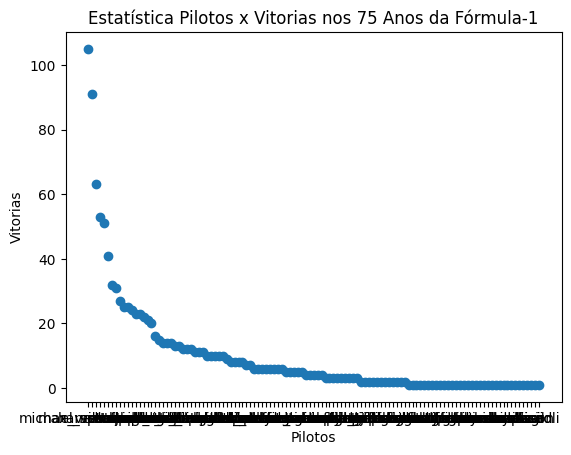

In [ ]:
# importação do pyplot
import matplotlib.pyplot as plt

# plotando o gráfico de comprimento x largura da sépala
plt.scatter(mvp_f1_estatistica['Piloto'], mvp_f1_estatistica['Vitorias'])

# incluindo título do gráfico e rótulos dos eixos
plt.title('Estatística Pilotos x Vitorias nos 75 Anos da Fórmula-1')
plt.xlabel('Pilotos')
plt.ylabel('Vitorias');

Se quisermos, também podemos plotar o mesmo gráfico, mas colori-lo de acordo com as espécies das flores (setosa, versicolor ou virginica). Para tal, faremos:

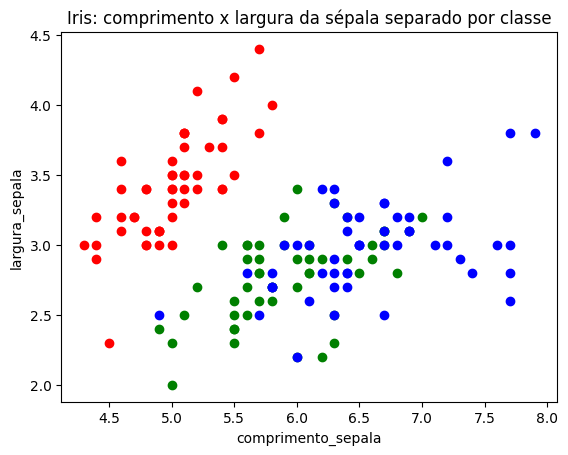

In [ ]:
# criando o dicionário de cores
cores = {'Iris-setosa':'r', 'Iris-versicolor':'g', 'Iris-virginica':'b'}

# plotando cada um dos pontos de dados
for i in range(len(iris['comprimento_sepala'])):
    plt.scatter(iris['comprimento_sepala'][i], iris['largura_sepala'][i], color=cores[iris['especie'][i]])

# incluindo título do gráfico e rótulos dos eixos
plt.title('Iris: comprimento x largura da sépala separado por classe')
plt.xlabel('comprimento_sepala')
plt.ylabel('largura_sepala');

Também podemos separar as classes no *scatterplot* usando diferentes marcadores em vez de usar cores (o que é útil em relatórios impressos em preto e branco). Para tal, basta fazer:

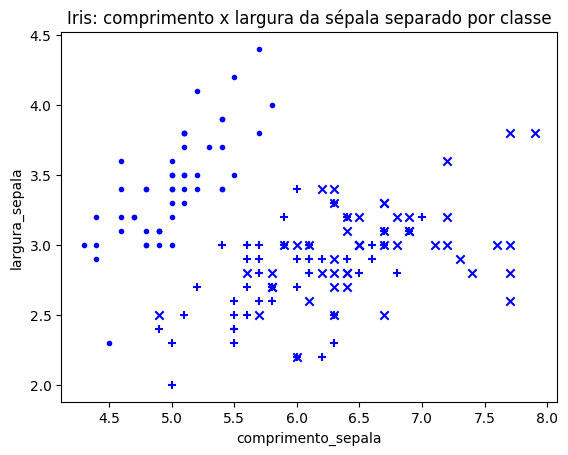

In [ ]:
# criando o dicionário de marcadores
marcadores = {'Iris-setosa':'.', 'Iris-versicolor':'+', 'Iris-virginica':'x'}

# plotando cada um dos pontos de dados
for i in range(len(iris['comprimento_sepala'])):
   plt.scatter(iris['comprimento_sepala'][i], iris['largura_sepala'][i], color='blue', marker=marcadores[iris['especie'][i]])

# incluindo título do gráfico e rótulos dos eixos
plt.title('Iris: comprimento x largura da sépala separado por classe')
plt.xlabel('comprimento_sepala')
plt.ylabel('largura_sepala');

Vamos agora trabalhar com um tipo diferente de gráficos: o **gráfico de linhas** (*line plot*). Este tipo de gráfico é utilizado geralmente quando estamos interessados em expressar variáveis que representam passagem de tempo, ou seja, mostrar a evolução histórica. Imagine que nosso dataset Iris esteja representado na ordem em que as amostras foram coletadas ao longo do tempo e queremos visualizar a variação dos atributos dos exemplos coletados ao longo do tempo. Neste caso, faríamos:

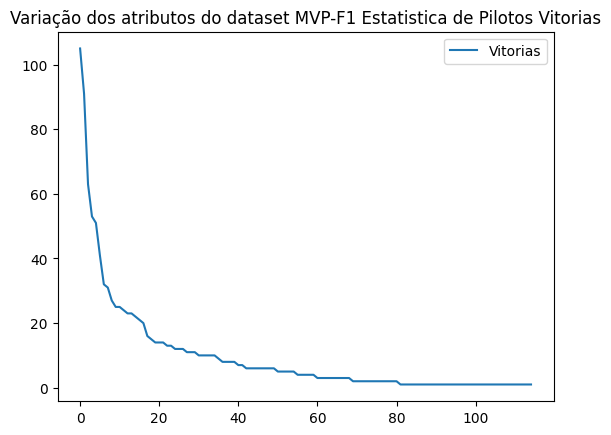

In [ ]:
# Gráfico de Linhas

# selecionando apenas os atributos para serem plotados em um novo dataframe, sem a classe
atributos = mvp_f1_estatistica.columns.drop(['Piloto'])

# criando o eixo x - vai de 0 até a quantidade de linhas do dataset iris - de 0 a 149
x_data = range(0, mvp_f1_estatistica.shape[0])

# plotando cada atributo
for atributo in atributos: # esse for percorre a lista: ['Vitorias']
    plt.plot(x_data, mvp_f1_estatistica[atributo], label=atributo)

# incluindo título do gráfico e legenda
plt.title('Variação dos atributos do dataset MVP-F1 Estatistica de Pilotos Vitorias')
plt.legend();

O **histograma** exibe a distribuição de frequências de uma determinada variável. É possível informarmos como parâmetro (entre muitas outras possibilidades) o número de bins, ou de colunas, que queremos exibir. O exemplo de código a seguir cria um histograma para o atributo comprimento da sépala, com 7 bins.

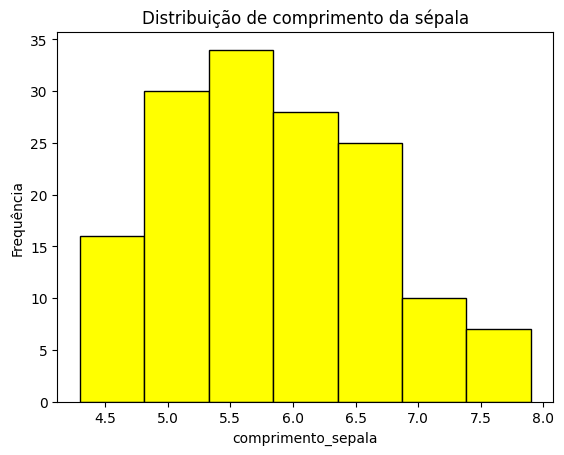

In [ ]:
# Histograma

# plotando o histograma
plt.hist(iris['comprimento_sepala'], bins=7, edgecolor='black', color='yellow')

# incluindo título do gráfico e legenda
plt.title('Distribuição de comprimento da sépala')
plt.ylabel('Frequência')
plt.xlabel('comprimento_sepala');

Por sua vez, o **gráfico de barras** (*bar plot*) apresenta retângulos (barras), com uma das dimensões proporcional à quantidade a ser representada e a outra arbitrária, mas igual para todas as barras. Os exemplos a seguir ilustram gráficos de barras (o primeiro, com barras verticais, também chamado de gráfico de colunas; e o segundo, com barras horizontais) para um dataset simples, que representa a profissão dos respondentes de uma pesquisa fictícia.

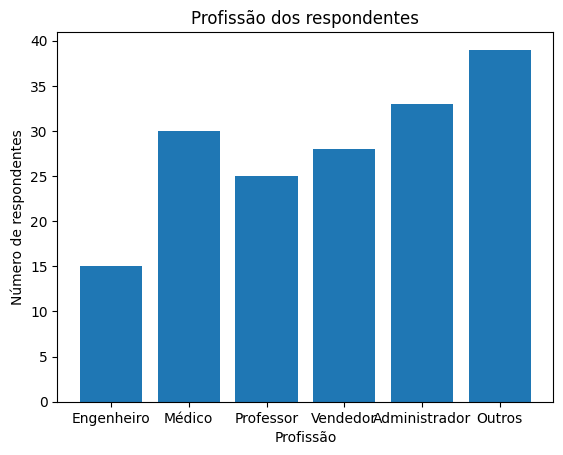

In [ ]:
# Atribuindo os valores de x e y
profissoes = ['Engenheiro', 'Médico', 'Professor', 'Vendedor', 'Administrador', 'Outros']
quantidade = [15, 30, 25, 28, 33, 39]

# Gráfico de Barras

# criando o gráfico de colunas
plt.bar(profissoes, quantidade)

# incluindo título do gráfico e legenda
plt.title("Profissão dos respondentes")
plt.xlabel("Profissão")
plt.ylabel("Número de respondentes");

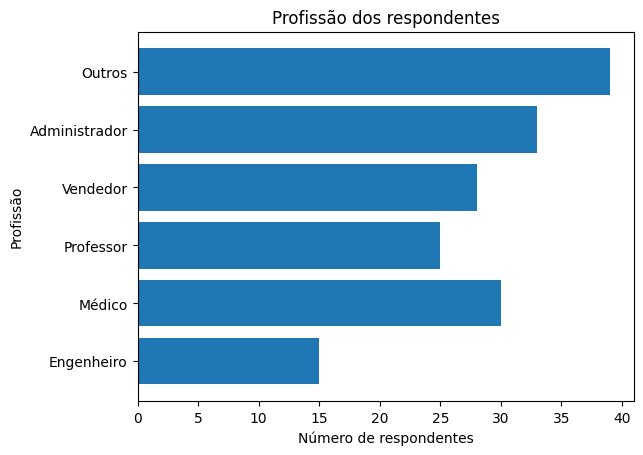

In [ ]:
# Gráfico de Barras Horizontal

# criando o gráfico de barras
plt.barh(profissoes, quantidade)

# incluindo título do gráfico e legenda
plt.title("Profissão dos respondentes")
plt.xlabel("Número de respondentes")
plt.ylabel("Profissão");

Outra visualização interessante para quantidades de uma variável é o **gráfico de pizza** (*pie plot*). Vejamos este gráfico com os mesmos dados do exemplo anterior:

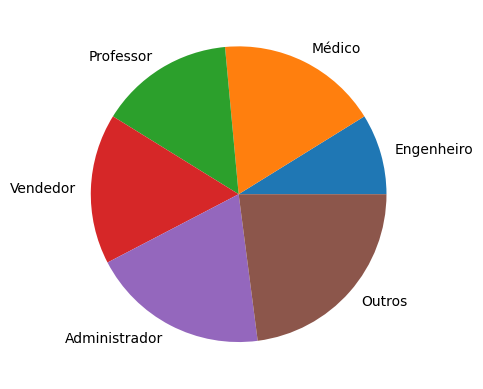

In [ ]:
# criando o gráfico de pizza
plt.pie(quantidade, labels = profissoes);

Para finalizar os exemplos da biblioteca Matplotlib, vamos plotar, em uma única figura, quatro histogramas do dataset Iris, um para cada atributo:

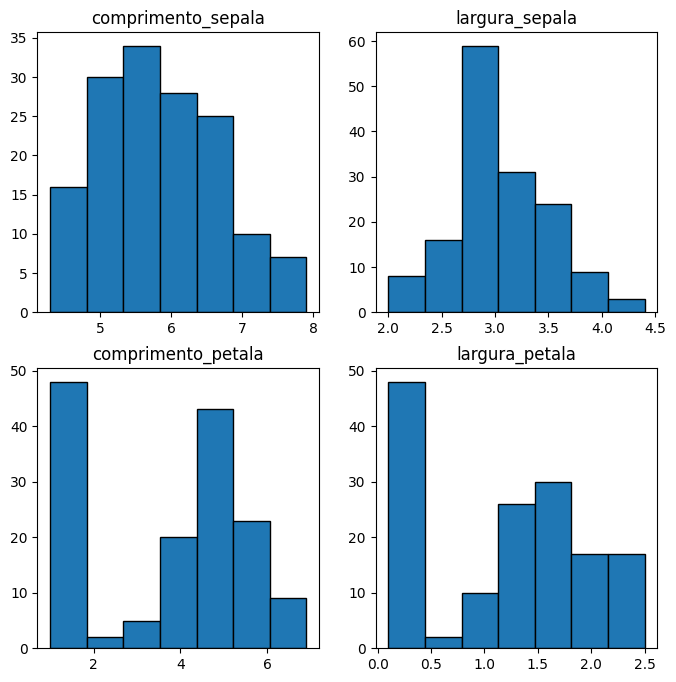

In [ ]:
# configurando um grupo de subplots em um grid de 1 linha e 2 colunas
# e também o tamanho da figura
fig, ax = plt.subplots(2,2, figsize = (8, 8))

# subplot1: histograma do comprimento_sepala
ax[0,0].hist(iris['comprimento_sepala'], bins=7, edgecolor='black')
ax[0,0].set_title("comprimento_sepala")

# subplot2: histograma da largura_sepala
ax[0,1].hist(iris['largura_sepala'], bins=7, edgecolor='black')
ax[0,1].set_title("largura_sepala")

# subplot3: histograma do comprimento_petala
ax[1,0].hist(iris['comprimento_petala'], bins=7, edgecolor='black')
ax[1,0].set_title("comprimento_petala")

# subplot4: histograma da largura_petala
ax[1,1].hist(iris['largura_petala'], bins=7, edgecolor='black');
ax[1,1].set_title("largura_petala");

Poderíamos fazer o mesmo do exemplo anterior, substituindo os histogramas por **boxplots**.

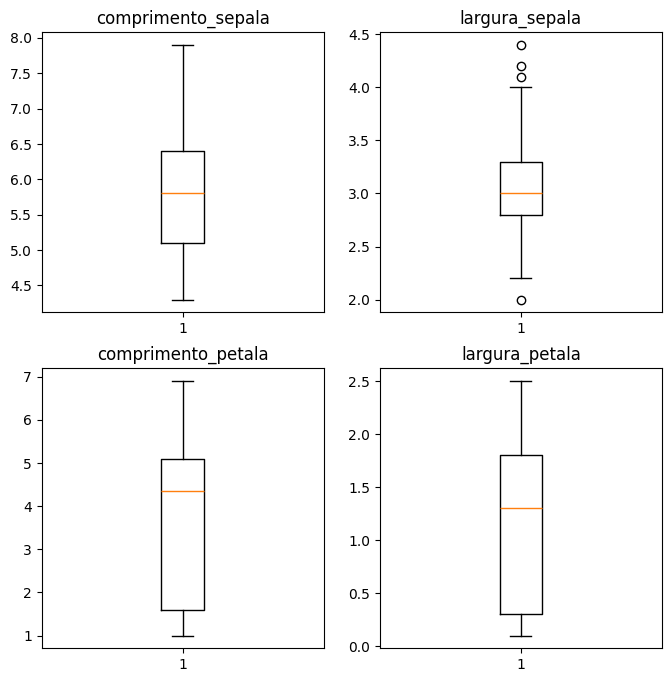

In [ ]:
# configurando um grupo de subplots em um grid de 1 linha e 2 colunas
# e também o tamanho da figura
fig, ax = plt.subplots(2,2, figsize = (8, 8))

# subplot1: boxplot do comprimento_sepala
ax[0,0].boxplot(iris['comprimento_sepala'])
ax[0,0].set_title("comprimento_sepala")

# subplot2: boxplot da largura_sepala
ax[0,1].boxplot(iris['largura_sepala'])
ax[0,1].set_title("largura_sepala")

# subplot3: boxplot do comprimento_petala
ax[1,0].boxplot(iris['comprimento_petala'])
ax[1,0].set_title("comprimento_petala")

# subplot4: boxplot da largura_petala
ax[1,1].boxplot(iris['largura_petala']);
ax[1,1].set_title("largura_petala");

É importante ressaltar que a biblioteca Matplotlib é muito extensa e seus gráficos são altamente configuráveis. Neste notebook, procuramos trazer apenas exemplos simples para facilitar o entendimento dos códigos. Entretanto, praticamente tudo pode ser customizado, desde configurações mais simples como cores, tamanhos ou exibição de labels, e até outras personalizações mais avançadas. Recomendamos que você procure estas opções na documentação oficial de acordo com a sua necessidade de uso.

## Seaborn

O **Seaborn** (https://seaborn.pydata.org/) é uma biblioteca de visualização baseada em Matplotlib, que oferece uma interface de alto nível para a criação de gráficos atrativos, profissionais e com análises estatísticas. Com ela, é possível escrever em uma linha um gráfico que precisaria de diversas linhas usando apenas Matplotlib. Os métodos de visualização da biblioteca Seaborn têm uma sintaxe mais simples, porém são mais limitados, sendo necessário utilizar a biblioteca Matplotlib para customizações adicionais.

Todos os exemplos a seguir utilizarão o dataset Iris, que já carregamos previamente. Você notará que os três primeiros exemplos de gráficos com Seaborn produzem o mesmo resultado de alguns gráficos que criamos com a Matplotlib. Vamos começar importando a biblioteca.

In [ ]:
# importação do Seaborn
import seaborn as sns

Agora vamos plotar um *scatter plot* simples, o mesmo *scatter plot* colorido por espécies e um gráfico de linhas com os atributos do dataset Iris. Repare que são necessárias bem menos linhas de código em comparação com o Matplotlib:

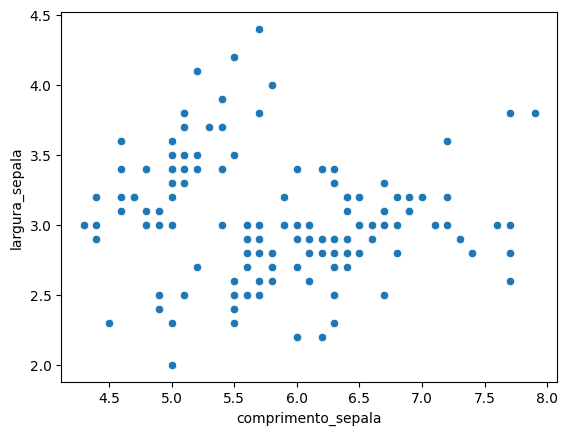

In [ ]:
# scatter plot com Seaborn
sns.scatterplot(x='comprimento_sepala', y='largura_sepala', data=iris);

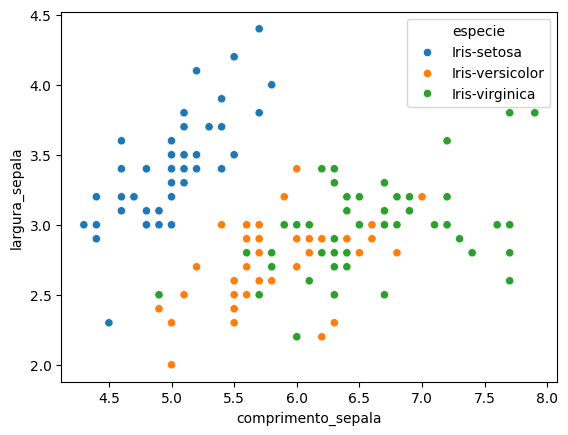

In [ ]:
# scatter plot com Seaborn colorido por classes
sns.scatterplot(x='comprimento_sepala', y='largura_sepala', hue='especie', data=iris);

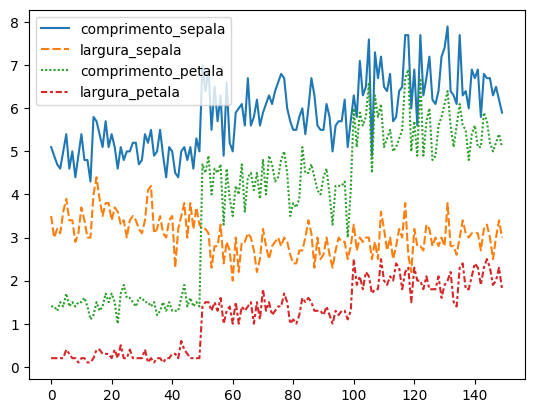

In [ ]:
# gráfico de linhas com Seaborn
sns.lineplot(data=iris.drop(['especie'], axis=1));

Vejamos um exemplo do gráfico boxplot com a biblioteca Seaborn, exbindo os boxplots de todos os atributos em um mesmo gráfico.

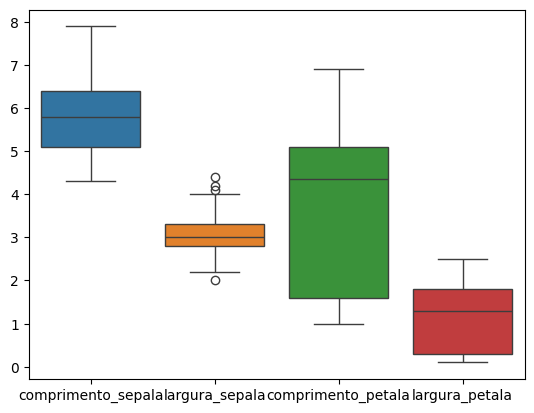

In [ ]:
# boxplot com Seaborn
sns.boxplot(data = iris);

Agora vamos plotar um histograma do comprimento da sépala.

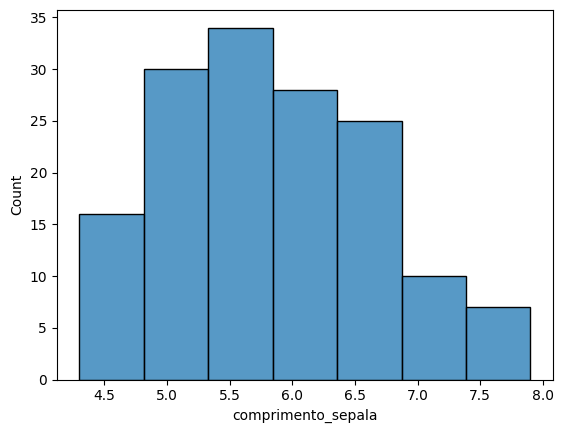

In [ ]:
# histograma com seaborn
sns.histplot(iris['comprimento_sepala'], bins=7);

Podemos também plotar boxplots simples facilmente:

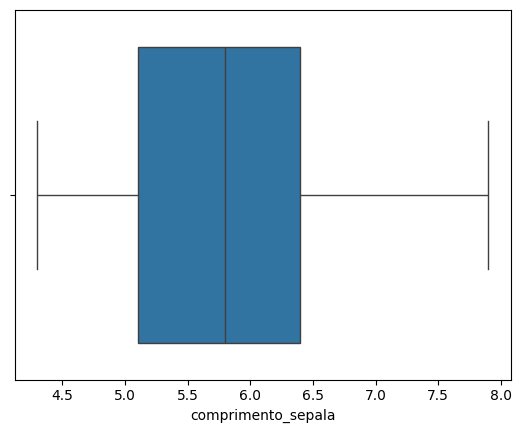

In [ ]:
# boxplot com seaborn
sns.boxplot(x=iris['comprimento_sepala']);

Um gráfico muito útil para a análise de dados é o **gráfico de correlação**, que exibe graficamente as correlações entre os atributos numéricos de um dataset. Com Seaborn, basta uma linha de código para plotá-la. Para fazer algo similar com Matplotlib são necessárias diversas linhas de código.

<Axes: >

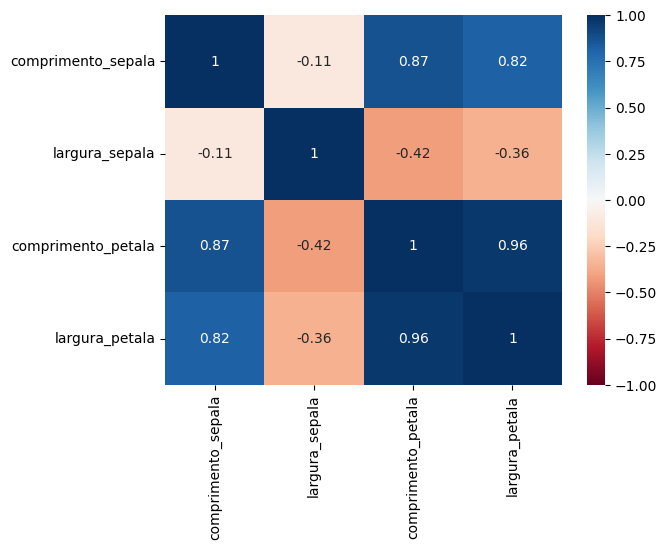

In [ ]:
# gráfico de correlação com Seaborn

# Código original da aula, contém erros pois o .corr() só funciona com colunas numéricas e
# tentar aplicar corr() diretamente pode causar erro dependendo da versão do pandas ou seaborn.
# sns.heatmap(iris.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

# Novo código que funciona
sns.heatmap(iris.select_dtypes(include='number').corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)


Para finalizar, vamos plotar um gráfico composto muito interessante que apresenta, em uma só figura, scatter plots de cada par de atributos numéricos do dataset e o histograma do atributo na diagonal principal. Se configurarmos o parâmetro hue, em vez do histograma, o gráfico exibirá na diagonal principal a distribuição de cada uma das espécies pelo atributo, usando density plots. Os dois exemplos são exibidos a seguir. Repare que basta uma única linha de código para que este gráfico tão interessante seja exibido.

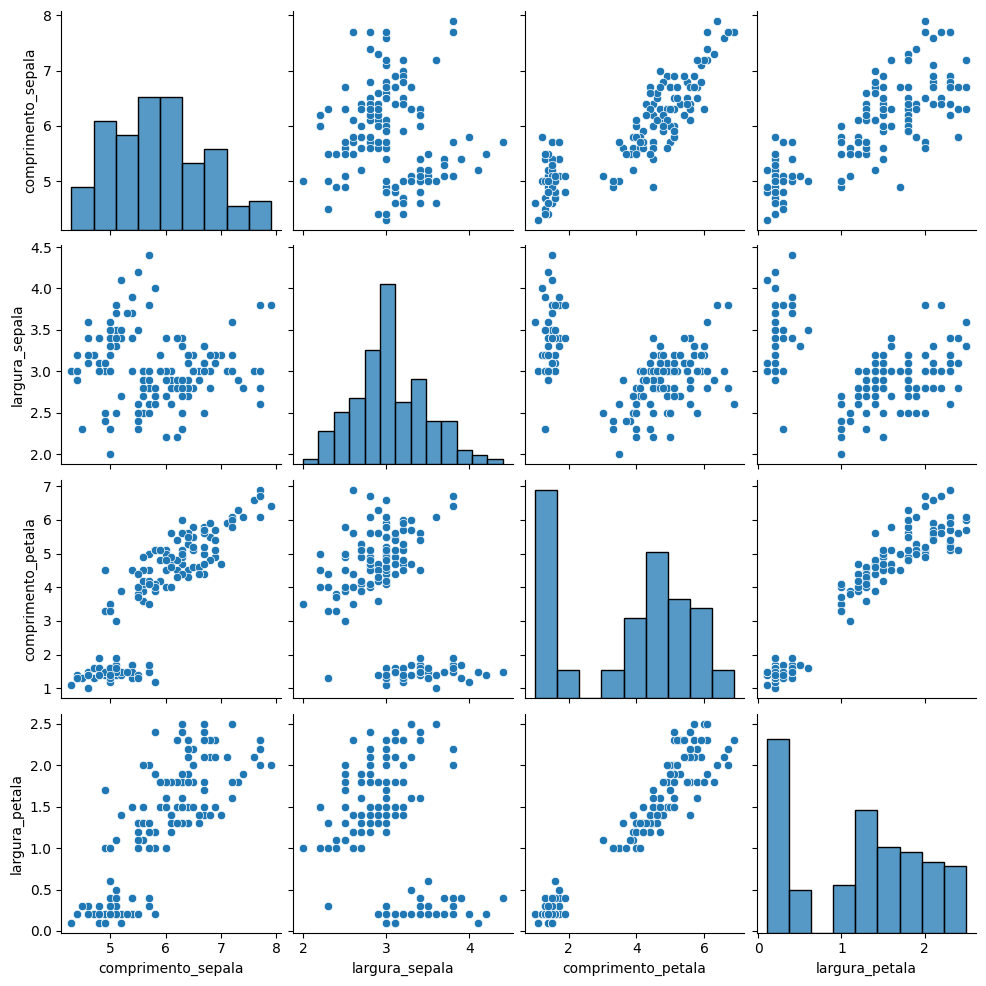

In [ ]:
# pair plot 1 com Seaborn
sns.pairplot(iris);

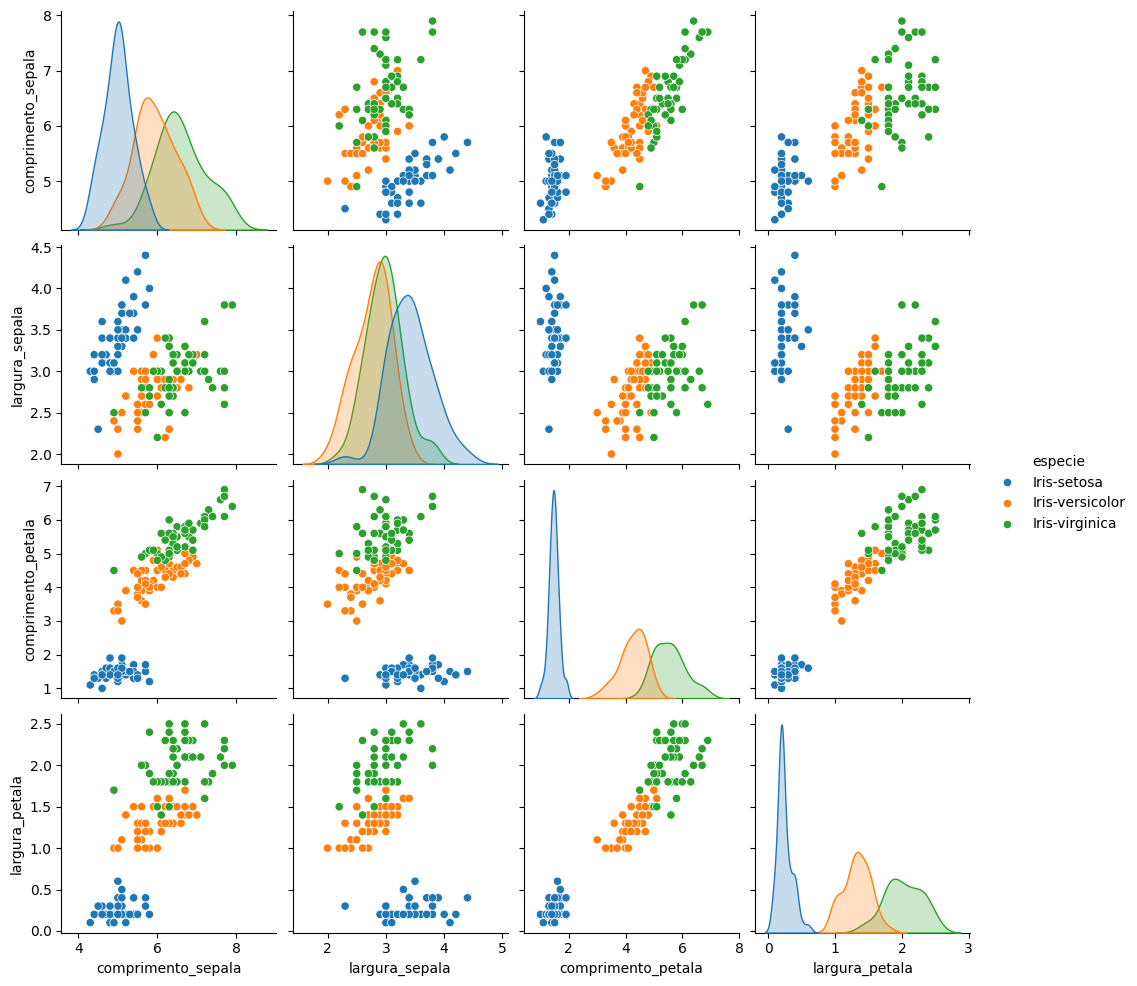

In [ ]:
# pair plot 2 com Seaborn
sns.pairplot(iris, hue = "especie");

Assim como a Matplotlib, a biblioteca Seaborn é muito extensa e seus gráficos podem ser personalizados de acordo com sua necessidade. Recomendamos que você explore mais exemplos na documentação oficial de acordo com a sua necessidade de uso.

/tmp/ipython-input-28-530221966.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Vitorias', y='Piloto', data=top_20_pilotos, palette='viridis')


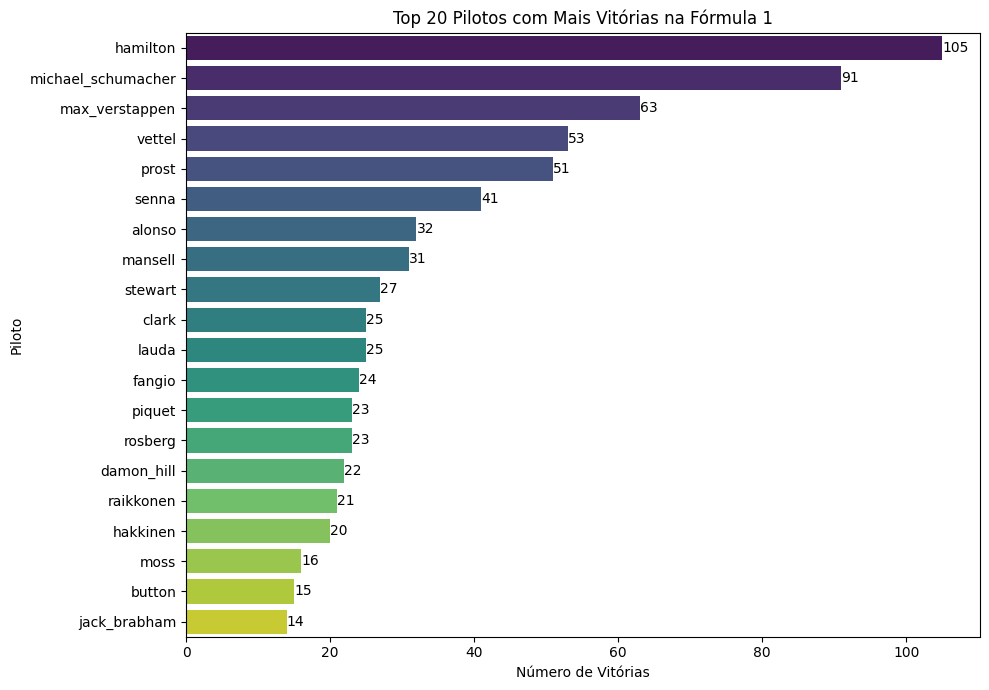

In [ ]:
# Ensure 'Vitorias' is numeric for sorting
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

mvp_f1_estatistica['Vitorias'] = pd.to_numeric(mvp_f1_estatistica['Vitorias'], errors='coerce')

# Get the top 20 drivers by victories
top_20_pilotos = mvp_f1_estatistica.sort_values(by='Vitorias', ascending=False).head(20)

# Plot the data
plt.figure(figsize=(10, 7))
ax = sns.barplot(x='Vitorias', y='Piloto', data=top_20_pilotos, palette='viridis')
plt.title('Top 20 Pilotos com Mais Vitórias na Fórmula 1')
plt.xlabel('Número de Vitórias')
plt.ylabel('Piloto')
plt.tight_layout()

# Add data labels
for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [ ]:
!pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26773 sha256=339c3e8f9e876dc9b949b5f4f1ccebb1c0382e83161e633f4fe7ce71c227e110
  Stored in directory: /root/.cache/pip/wheels/68/5d/a5/edc271b998f909801d7956959f699b976cc9896075dc47c153
Successfully built pandasql


In [ ]:
import pandas as pd
from pandasql import sqldf

# Base URL for the data files
base_url = 'https://raw.githubusercontent.com/emersonvasconcelos/f1/refs/heads/warm-up/'

# Load the DataFrames from URLs
results = pd.read_csv(base_url + 'results.csv')
drivers = pd.read_csv(base_url + 'drivers.csv')
constructors = pd.read_csv(base_url + 'constructors.csv')
races = pd.read_csv(base_url + 'races.csv')
circuits = pd.read_csv(base_url + 'circuits.csv')
seasons = pd.read_csv(base_url + 'seasons.csv')

# Consulta SQL
query = """
SELECT
    s.year AS AnoTemporada,
    r.name AS NomeCorrida,
    c.name AS NomeCircuito,
    d.forename || ' ' || d.surname AS NomePiloto,
    cons.name AS NomeConstrutor,
    res.grid AS GridLargada,
    res.positionText AS PosicaoFinal,
    res.points AS Pontos,
    res.laps AS Voltas,
    res.time AS TempoCorrida,
    res.fastestLapTime AS MelhorVoltaTempo,
    res.rank AS RankMelhorVolta
FROM
    results res
JOIN
    drivers d ON res.driverId = d.driverId
JOIN
    constructors cons ON res.constructorId = cons.constructorId
JOIN
    races r ON res.raceId = r.raceId
JOIN
    circuits c ON r.circuitId = c.circuitId
JOIN
    seasons s ON r.year = s.year
WHERE NomePiloto = 'Lewis Hamilton'
ORDER BY
    s.year DESC, r.name, res.positionOrder;
"""

# Executar a consulta
Resultados_F1 = sqldf(query, globals())

# Exibir as primeiras linhas da nova tabela
print(Resultados_F1.head())

   AnoTemporada            NomeCorrida                    NomeCircuito  \
0          2024   Abu Dhabi Grand Prix              Yas Marina Circuit   
1          2024  Australian Grand Prix  Albert Park Grand Prix Circuit   
2          2024    Austrian Grand Prix                   Red Bull Ring   
3          2024  Azerbaijan Grand Prix               Baku City Circuit   
4          2024     Bahrain Grand Prix   Bahrain International Circuit   

       NomePiloto NomeConstrutor  GridLargada PosicaoFinal  Pontos  Voltas  \
0  Lewis Hamilton       Mercedes           16            4    12.0      58   
1  Lewis Hamilton       Mercedes           11            R     0.0      15   
2  Lewis Hamilton       Mercedes            5            4    12.0      71   
3  Lewis Hamilton       Mercedes            0            9     2.0      51   
4  Lewis Hamilton       Mercedes            9            7     6.0      57   

  TempoCorrida MelhorVoltaTempo RankMelhorVolta  
0      +36.483         1:27.278     

In [2]:
!pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26773 sha256=06e043b372305c17c610779c400bd39498ba5542635dee133545dceca7588948
  Stored in directory: /root/.cache/pip/wheels/68/5d/a5/edc271b998f909801d7956959f699b976cc9896075dc47c153
Successfully built pandasql


In [5]:
!pip install pandasql
import pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26773 sha256=516a8864d526a5f8b7ff923b736a27dc9c3ea587253bc2c0c41c56347e48efca
  Stored in directory: /root/.cache/pip/wheels/68/5d/a5/edc271b998f909801d7956959f699b976cc9896075dc47c153
Successfully built pandasql
